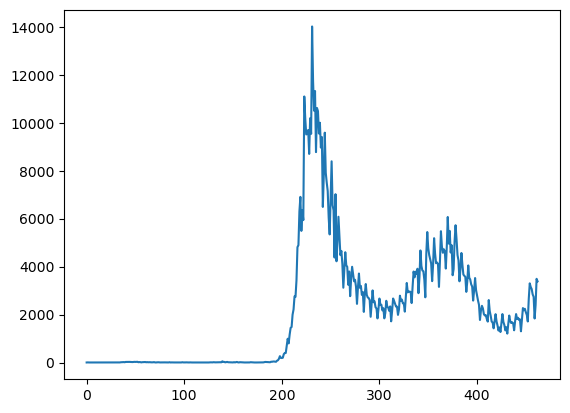

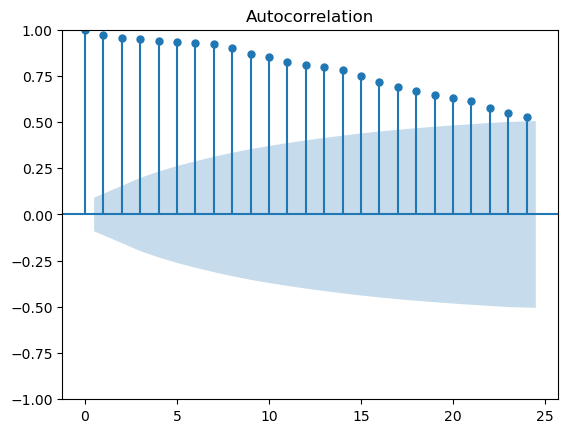

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


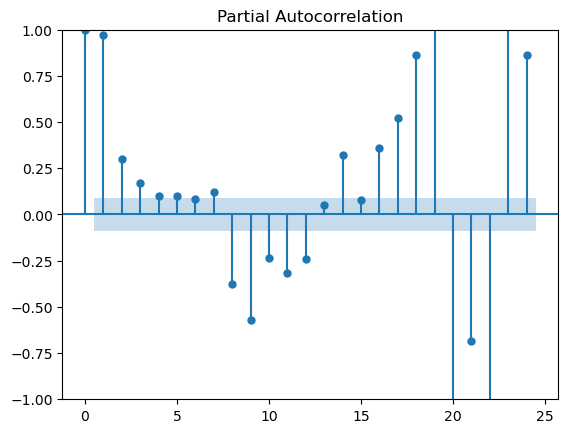

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\桃園市每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Taoyuan.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Taoyuan_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Taoyuan_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\桃園市每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        4
2        1
3        1
4        1
..     ...
459   1836
460   2396
461   3491
462   3386
463   3017

[464 rows x 1 columns]
464


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
42/42 [==============================] - 4s 25ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/5000
42/42 [==============================]

42/42 [==============================] - 0s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 7.9180e-04 - val_mse: 7.9180e-04
Epoch 56/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.7196e-04 - val_mse: 7.7196e-04
Epoch 57/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 7.6175e-04 - val_mse: 7.6175e-04
Epoch 58/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 7.5866e-04 - val_mse: 7.5866e-04
Epoch 59/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 7.4870e-04 - val_mse: 7.4870e-04
Epoch 60/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.4897e-04 - val_mse: 7.4897e-04
Epoch 61/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 7.4322e-04 - val_mse: 7.4322e-04
Epoch 62/5000
42/42 [====

42/42 [==============================] - 0s 6ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 6.7994e-04 - val_mse: 6.7994e-04
Epoch 114/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.8453e-04 - val_mse: 6.8453e-04
Epoch 115/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.8951e-04 - val_mse: 6.8951e-04
Epoch 116/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9248e-04 - val_mse: 6.9248e-04
Epoch 117/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.8942e-04 - val_mse: 6.8942e-04
Epoch 118/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9445e-04 - val_mse: 6.9445e-04
Epoch 119/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9471e-04 - val_mse: 6.9471e-04
Epoch 120/5000
42/42 

Epoch 171/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4349e-04 - val_mse: 7.4349e-04
Epoch 172/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4729e-04 - val_mse: 7.4729e-04
Epoch 173/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5579e-04 - val_mse: 7.5579e-04
Epoch 174/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5368e-04 - val_mse: 7.5368e-04
Epoch 175/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4335e-04 - val_mse: 7.4335e-04
Epoch 176/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4353e-04 - val_mse: 7.4353e-04
Epoch 177/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5415e-04 - val_mse: 7.5415e-04
Epoch 

Epoch 229/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5761e-04 - val_mse: 7.5761e-04
Epoch 230/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6431e-04 - val_mse: 7.6431e-04
Epoch 231/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5597e-04 - val_mse: 7.5597e-04
Epoch 232/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6460e-04 - val_mse: 7.6460e-04
Epoch 233/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6336e-04 - val_mse: 7.6336e-04
Epoch 234/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6212e-04 - val_mse: 7.6212e-04
Epoch 235/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7002e-04 - val_mse: 7.7002e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6619e-04 - val_mse: 7.6619e-04
Epoch 287/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6673e-04 - val_mse: 7.6673e-04
Epoch 288/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6267e-04 - val_mse: 7.6267e-04
Epoch 289/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6242e-04 - val_mse: 7.6242e-04
Epoch 290/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7324e-04 - val_mse: 7.7324e-04
Epoch 291/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5956e-04 - val_mse: 7.5956e-04
Epoch 292/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7122e-04 - val_mse: 7.7122e-04
Epoch 293/5000
42/42 

Epoch 344/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6604e-04 - val_mse: 7.6604e-04
Epoch 345/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6583e-04 - val_mse: 7.6583e-04
Epoch 346/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6643e-04 - val_mse: 7.6643e-04
Epoch 347/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6451e-04 - val_mse: 7.6451e-04
Epoch 348/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5977e-04 - val_mse: 7.5977e-04
Epoch 349/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6185e-04 - val_mse: 7.6185e-04
Epoch 350/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7717e-04 - val_mse: 7.7717e-04
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6013e-04 - val_mse: 7.6013e-04
Epoch 402/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5819e-04 - val_mse: 7.5819e-04
Epoch 403/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5753e-04 - val_mse: 7.5753e-04
Epoch 404/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6734e-04 - val_mse: 7.6734e-04
Epoch 405/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6531e-04 - val_mse: 7.6531e-04
Epoch 406/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6279e-04 - val_mse: 7.6279e-04
Epoch 407/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6213e-04 - val_mse: 7.6213e-04
Epoch 408/5000
42/42 

Epoch 459/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6577e-04 - val_mse: 7.6577e-04
Epoch 460/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5771e-04 - val_mse: 7.5771e-04
Epoch 461/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6407e-04 - val_mse: 7.6407e-04
Epoch 462/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6215e-04 - val_mse: 7.6215e-04
Epoch 463/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6210e-04 - val_mse: 7.6210e-04
Epoch 464/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6831e-04 - val_mse: 7.6831e-04
Epoch 465/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5728e-04 - val_mse: 7.5728e-04
Epoch 

Epoch 517/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7057e-04 - val_mse: 7.7057e-04
Epoch 518/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6284e-04 - val_mse: 7.6284e-04
Epoch 519/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7048e-04 - val_mse: 7.7048e-04
Epoch 520/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7081e-04 - val_mse: 7.7081e-04
Epoch 521/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6475e-04 - val_mse: 7.6475e-04
Epoch 522/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5768e-04 - val_mse: 7.5768e-04
Epoch 523/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6004e-04 - val_mse: 7.6004e-04
Epoch 

Epoch 575/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6045e-04 - val_mse: 7.6045e-04
Epoch 576/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6392e-04 - val_mse: 7.6392e-04
Epoch 577/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5676e-04 - val_mse: 7.5676e-04
Epoch 578/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5113e-04 - val_mse: 7.5113e-04
Epoch 579/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6150e-04 - val_mse: 7.6150e-04
Epoch 580/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6244e-04 - val_mse: 7.6244e-04
Epoch 581/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5496e-04 - val_mse: 7.5496e-04
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6386e-04 - val_mse: 7.6386e-04
Epoch 633/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5595e-04 - val_mse: 7.5595e-04
Epoch 634/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5853e-04 - val_mse: 7.5853e-04
Epoch 635/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5719e-04 - val_mse: 7.5719e-04
Epoch 636/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6391e-04 - val_mse: 7.6391e-04
Epoch 637/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6150e-04 - val_mse: 7.6150e-04
Epoch 638/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5869e-04 - val_mse: 7.5869e-04
Epoch 639/5000
42/42 

Epoch 690/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5954e-04 - val_mse: 7.5954e-04
Epoch 691/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5729e-04 - val_mse: 7.5729e-04
Epoch 692/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6166e-04 - val_mse: 7.6166e-04
Epoch 693/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6295e-04 - val_mse: 7.6295e-04
Epoch 694/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5838e-04 - val_mse: 7.5838e-04
Epoch 695/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6441e-04 - val_mse: 7.6441e-04
Epoch 696/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5521e-04 - val_mse: 7.5521e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6164e-04 - val_mse: 7.6164e-04
Epoch 748/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6237e-04 - val_mse: 7.6237e-04
Epoch 749/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5877e-04 - val_mse: 7.5877e-04
Epoch 750/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6130e-04 - val_mse: 7.6130e-04
Epoch 751/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5991e-04 - val_mse: 7.5991e-04
Epoch 752/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5265e-04 - val_mse: 7.5265e-04
Epoch 753/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5668e-04 - val_mse: 7.5668e-04
Epoch 754/5000
42/42 

Epoch 805/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5538e-04 - val_mse: 7.5538e-04
Epoch 806/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5933e-04 - val_mse: 7.5933e-04
Epoch 807/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5734e-04 - val_mse: 7.5734e-04
Epoch 808/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5696e-04 - val_mse: 7.5696e-04
Epoch 809/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6012e-04 - val_mse: 7.6012e-04
Epoch 810/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5358e-04 - val_mse: 7.5358e-04
Epoch 811/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6073e-04 - val_mse: 7.6073e-04
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5744e-04 - val_mse: 7.5744e-04
Epoch 863/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6495e-04 - val_mse: 7.6495e-04
Epoch 864/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5289e-04 - val_mse: 7.5289e-04
Epoch 865/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6131e-04 - val_mse: 7.6131e-04
Epoch 866/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6685e-04 - val_mse: 7.6685e-04
Epoch 867/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6262e-04 - val_mse: 7.6262e-04
Epoch 868/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5721e-04 - val_mse: 7.5721e-04
Epoch 869/5000
42/42 

Epoch 920/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5327e-04 - val_mse: 7.5327e-04
Epoch 921/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6374e-04 - val_mse: 7.6374e-04
Epoch 922/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5695e-04 - val_mse: 7.5695e-04
Epoch 923/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6160e-04 - val_mse: 7.6160e-04
Epoch 924/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5467e-04 - val_mse: 7.5467e-04
Epoch 925/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6439e-04 - val_mse: 7.6439e-04
Epoch 926/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5691e-04 - val_mse: 7.5691e-04
Epoch 

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5500e-04 - val_mse: 7.5500e-04
Epoch 978/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5137e-04 - val_mse: 7.5137e-04
Epoch 979/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6576e-04 - val_mse: 7.6576e-04
Epoch 980/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5571e-04 - val_mse: 7.5571e-04
Epoch 981/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5661e-04 - val_mse: 7.5661e-04
Epoch 982/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5751e-04 - val_mse: 7.5751e-04
Epoch 983/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5505e-04 - val_mse: 7.5505e-04
Epoch 984/5000
42/42 

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5519e-04 - val_mse: 7.5519e-04
Epoch 1035/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6188e-04 - val_mse: 7.6188e-04
Epoch 1036/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6040e-04 - val_mse: 7.6040e-04
Epoch 1037/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5049e-04 - val_mse: 7.5049e-04
Epoch 1038/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5637e-04 - val_mse: 7.5637e-04
Epoch 1039/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4991e-04 - val_mse: 7.4991e-04
Epoch 1040/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5344e-04 - val_mse: 7.5344e-04
Epoch 1041/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5653e-04 - val_mse: 7.5653e-04
Epoch 1092/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5031e-04 - val_mse: 7.5031e-04
Epoch 1093/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5528e-04 - val_mse: 7.5528e-04
Epoch 1094/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5401e-04 - val_mse: 7.5401e-04
Epoch 1095/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5158e-04 - val_mse: 7.5158e-04
Epoch 1096/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5401e-04 - val_mse: 7.5401e-04
Epoch 1097/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5797e-04 - val_mse: 7.5797e-04
Epoch 1098/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5101e-04 - val_mse: 7.5101e-04
Epoch 1149/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4999e-04 - val_mse: 7.4999e-04
Epoch 1150/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5439e-04 - val_mse: 7.5439e-04
Epoch 1151/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5453e-04 - val_mse: 7.5453e-04
Epoch 1152/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6044e-04 - val_mse: 7.6044e-04
Epoch 1153/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5407e-04 - val_mse: 7.5407e-04
Epoch 1154/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5432e-04 - val_mse: 7.5432e-04
Epoch 1155/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5037e-04 - val_mse: 7.5037e-04
Epoch 1206/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5062e-04 - val_mse: 7.5062e-04
Epoch 1207/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5494e-04 - val_mse: 7.5494e-04
Epoch 1208/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5267e-04 - val_mse: 7.5267e-04
Epoch 1209/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5485e-04 - val_mse: 7.5485e-04
Epoch 1210/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5886e-04 - val_mse: 7.5886e-04
Epoch 1211/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5474e-04 - val_mse: 7.5474e-04
Epoch 1212/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5359e-04 - val_mse: 7.5359e-04
Epoch 1263/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5216e-04 - val_mse: 7.5216e-04
Epoch 1264/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5188e-04 - val_mse: 7.5188e-04
Epoch 1265/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5380e-04 - val_mse: 7.5380e-04
Epoch 1266/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5055e-04 - val_mse: 7.5055e-04
Epoch 1267/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5344e-04 - val_mse: 7.5344e-04
Epoch 1268/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5820e-04 - val_mse: 7.5820e-04
Epoch 1269/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5058e-04 - val_mse: 7.5058e-04
Epoch 1320/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4735e-04 - val_mse: 7.4735e-04
Epoch 1321/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5091e-04 - val_mse: 7.5091e-04
Epoch 1322/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5256e-04 - val_mse: 7.5256e-04
Epoch 1323/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4942e-04 - val_mse: 7.4942e-04
Epoch 1324/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5109e-04 - val_mse: 7.5109e-04
Epoch 1325/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5082e-04 - val_mse: 7.5082e-04
Epoch 1326/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5014e-04 - val_mse: 7.5014e-04
Epoch 1377/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4667e-04 - val_mse: 7.4667e-04
Epoch 1378/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5624e-04 - val_mse: 7.5624e-04
Epoch 1379/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5298e-04 - val_mse: 7.5298e-04
Epoch 1380/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4903e-04 - val_mse: 7.4903e-04
Epoch 1381/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4996e-04 - val_mse: 7.4996e-04
Epoch 1382/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5011e-04 - val_mse: 7.5011e-04
Epoch 1383/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4579e-04 - val_mse: 7.4579e-04
Epoch 1691/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5098e-04 - val_mse: 7.5098e-04
Epoch 1692/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4414e-04 - val_mse: 7.4414e-04
Epoch 1693/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4597e-04 - val_mse: 7.4597e-04
Epoch 1694/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4933e-04 - val_mse: 7.4933e-04
Epoch 1695/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5010e-04 - val_mse: 7.5010e-04
Epoch 1696/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4822e-04 - val_mse: 7.4822e-04
Epoch 1697/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4790e-04 - val_mse: 7.4790e-04
Epoch 1748/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4518e-04 - val_mse: 7.4518e-04
Epoch 1749/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4916e-04 - val_mse: 7.4916e-04
Epoch 1750/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4652e-04 - val_mse: 7.4652e-04
Epoch 1751/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4496e-04 - val_mse: 7.4496e-04
Epoch 1752/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4568e-04 - val_mse: 7.4568e-04
Epoch 1753/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5020e-04 - val_mse: 7.5020e-04
Epoch 1754/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5483e-04 - val_mse: 7.5483e-04
Epoch 1805/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4781e-04 - val_mse: 7.4781e-04
Epoch 1806/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4875e-04 - val_mse: 7.4875e-04
Epoch 1807/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4781e-04 - val_mse: 7.4781e-04
Epoch 1808/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5273e-04 - val_mse: 7.5273e-04
Epoch 1809/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5005e-04 - val_mse: 7.5005e-04
Epoch 1810/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5390e-04 - val_mse: 7.5390e-04
Epoch 1811/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4976e-04 - val_mse: 7.4976e-04
Epoch 1862/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4880e-04 - val_mse: 7.4880e-04
Epoch 1863/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4465e-04 - val_mse: 7.4465e-04
Epoch 1864/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4670e-04 - val_mse: 7.4670e-04
Epoch 1865/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5129e-04 - val_mse: 7.5129e-04
Epoch 1866/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4858e-04 - val_mse: 7.4858e-04
Epoch 1867/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4757e-04 - val_mse: 7.4757e-04
Epoch 1868/5000

42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4271e-04 - val_mse: 7.4271e-04
Epoch 1919/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4806e-04 - val_mse: 7.4806e-04
Epoch 1920/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4686e-04 - val_mse: 7.4686e-04
Epoch 1921/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5106e-04 - val_mse: 7.5106e-04
Epoch 1922/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5422e-04 - val_mse: 7.5422e-04
Epoch 1923/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4873e-04 - val_mse: 7.4873e-04
Epoch 1924/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4532e-04 - val_mse: 7.4532e-04
Epoch 1925/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4333e-04 - val_mse: 7.4333e-04
Epoch 1976/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4325e-04 - val_mse: 7.4325e-04
Epoch 1977/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5099e-04 - val_mse: 7.5099e-04
Epoch 1978/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5001e-04 - val_mse: 7.5001e-04
Epoch 1979/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5026e-04 - val_mse: 7.5026e-04
Epoch 1980/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4550e-04 - val_mse: 7.4550e-04
Epoch 1981/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4570e-04 - val_mse: 7.4570e-04
Epoch 1982/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5077e-04 - val_mse: 7.5077e-04
Epoch 2033/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4194e-04 - val_mse: 7.4194e-04
Epoch 2034/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4670e-04 - val_mse: 7.4670e-04
Epoch 2035/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4826e-04 - val_mse: 7.4826e-04
Epoch 2036/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4911e-04 - val_mse: 7.4911e-04
Epoch 2037/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4344e-04 - val_mse: 7.4344e-04
Epoch 2038/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4647e-04 - val_mse: 7.4647e-04
Epoch 2039/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4541e-04 - val_mse: 7.4541e-04
Epoch 2090/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4613e-04 - val_mse: 7.4613e-04
Epoch 2091/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4308e-04 - val_mse: 7.4308e-04
Epoch 2092/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4294e-04 - val_mse: 7.4294e-04
Epoch 2093/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4581e-04 - val_mse: 7.4581e-04
Epoch 2094/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4538e-04 - val_mse: 7.4538e-04
Epoch 2095/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4831e-04 - val_mse: 7.4831e-04
Epoch 2096/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4654e-04 - val_mse: 7.4654e-04
Epoch 2147/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4043e-04 - val_mse: 7.4043e-04
Epoch 2148/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4867e-04 - val_mse: 7.4867e-04
Epoch 2149/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4982e-04 - val_mse: 7.4982e-04
Epoch 2150/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4486e-04 - val_mse: 7.4486e-04
Epoch 2151/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4547e-04 - val_mse: 7.4547e-04
Epoch 2152/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4833e-04 - val_mse: 7.4833e-04
Epoch 2153/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4825e-04 - val_mse: 7.4825e-04
Epoch 2204/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4521e-04 - val_mse: 7.4521e-04
Epoch 2205/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4676e-04 - val_mse: 7.4676e-04
Epoch 2206/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5131e-04 - val_mse: 7.5131e-04
Epoch 2207/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4320e-04 - val_mse: 7.4320e-04
Epoch 2208/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4484e-04 - val_mse: 7.4484e-04
Epoch 2209/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4284e-04 - val_mse: 7.4284e-04
Epoch 2210/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4507e-04 - val_mse: 7.4507e-04
Epoch 2261/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4644e-04 - val_mse: 7.4644e-04
Epoch 2262/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4105e-04 - val_mse: 7.4105e-04
Epoch 2263/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4799e-04 - val_mse: 7.4799e-04
Epoch 2264/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4534e-04 - val_mse: 7.4534e-04
Epoch 2265/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4008e-04 - val_mse: 7.4008e-04
Epoch 2266/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4586e-04 - val_mse: 7.4586e-04
Epoch 2267/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3992e-04 - val_mse: 7.3992e-04
Epoch 2318/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4381e-04 - val_mse: 7.4381e-04
Epoch 2319/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4158e-04 - val_mse: 7.4158e-04
Epoch 2320/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3989e-04 - val_mse: 7.3989e-04
Epoch 2321/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4122e-04 - val_mse: 7.4122e-04
Epoch 2322/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4297e-04 - val_mse: 7.4297e-04
Epoch 2323/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3808e-04 - val_mse: 7.3808e-04
Epoch 2324/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4514e-04 - val_mse: 7.4514e-04
Epoch 2375/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4131e-04 - val_mse: 7.4131e-04
Epoch 2376/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4437e-04 - val_mse: 7.4437e-04
Epoch 2377/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4446e-04 - val_mse: 7.4446e-04
Epoch 2378/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4737e-04 - val_mse: 7.4737e-04
Epoch 2379/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4198e-04 - val_mse: 7.4198e-04
Epoch 2380/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4539e-04 - val_mse: 7.4539e-04
Epoch 2381/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4751e-04 - val_mse: 7.4751e-04
Epoch 2432/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4343e-04 - val_mse: 7.4343e-04
Epoch 2433/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4197e-04 - val_mse: 7.4197e-04
Epoch 2434/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4256e-04 - val_mse: 7.4256e-04
Epoch 2435/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3749e-04 - val_mse: 7.3749e-04
Epoch 2436/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4397e-04 - val_mse: 7.4397e-04
Epoch 2437/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4930e-04 - val_mse: 7.4930e-04
Epoch 2438/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4287e-04 - val_mse: 7.4287e-04
Epoch 2489/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4699e-04 - val_mse: 7.4699e-04
Epoch 2490/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4272e-04 - val_mse: 7.4272e-04
Epoch 2491/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3846e-04 - val_mse: 7.3846e-04
Epoch 2492/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3963e-04 - val_mse: 7.3963e-04
Epoch 2493/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4093e-04 - val_mse: 7.4093e-04
Epoch 2494/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4006e-04 - val_mse: 7.4006e-04
Epoch 2495/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4159e-04 - val_mse: 7.4159e-04
Epoch 2546/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3857e-04 - val_mse: 7.3857e-04
Epoch 2547/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3990e-04 - val_mse: 7.3990e-04
Epoch 2548/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3938e-04 - val_mse: 7.3938e-04
Epoch 2549/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4007e-04 - val_mse: 7.4007e-04
Epoch 2550/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4094e-04 - val_mse: 7.4094e-04
Epoch 2551/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3759e-04 - val_mse: 7.3759e-04
Epoch 2552/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3732e-04 - val_mse: 7.3732e-04
Epoch 2603/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4623e-04 - val_mse: 7.4623e-04
Epoch 2604/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3955e-04 - val_mse: 7.3955e-04
Epoch 2605/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3865e-04 - val_mse: 7.3865e-04
Epoch 2606/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4354e-04 - val_mse: 7.4354e-04
Epoch 2607/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4190e-04 - val_mse: 7.4190e-04
Epoch 2608/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4267e-04 - val_mse: 7.4267e-04
Epoch 2609/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4062e-04 - val_mse: 7.4062e-04
Epoch 2660/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4015e-04 - val_mse: 7.4015e-04
Epoch 2661/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4601e-04 - val_mse: 7.4601e-04
Epoch 2662/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3629e-04 - val_mse: 7.3629e-04
Epoch 2663/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4451e-04 - val_mse: 7.4451e-04
Epoch 2664/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3753e-04 - val_mse: 7.3753e-04
Epoch 2665/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4188e-04 - val_mse: 7.4188e-04
Epoch 2666/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4531e-04 - val_mse: 7.4531e-04
Epoch 2717/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3577e-04 - val_mse: 7.3577e-04
Epoch 2718/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4087e-04 - val_mse: 7.4087e-04
Epoch 2719/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4117e-04 - val_mse: 7.4117e-04
Epoch 2720/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4359e-04 - val_mse: 7.4359e-04
Epoch 2721/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3683e-04 - val_mse: 7.3683e-04
Epoch 2722/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4379e-04 - val_mse: 7.4379e-04
Epoch 2723/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4671e-04 - val_mse: 7.4671e-04
Epoch 2774/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4012e-04 - val_mse: 7.4012e-04
Epoch 2775/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4198e-04 - val_mse: 7.4198e-04
Epoch 2776/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4221e-04 - val_mse: 7.4221e-04
Epoch 2777/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3978e-04 - val_mse: 7.3978e-04
Epoch 2778/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4066e-04 - val_mse: 7.4066e-04
Epoch 2779/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3757e-04 - val_mse: 7.3757e-04
Epoch 2780/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3729e-04 - val_mse: 7.3729e-04
Epoch 2831/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4460e-04 - val_mse: 7.4460e-04
Epoch 2832/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4306e-04 - val_mse: 7.4306e-04
Epoch 2833/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4218e-04 - val_mse: 7.4218e-04
Epoch 2834/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3687e-04 - val_mse: 7.3687e-04
Epoch 2835/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3932e-04 - val_mse: 7.3932e-04
Epoch 2836/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3997e-04 - val_mse: 7.3997e-04
Epoch 2837/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4161e-04 - val_mse: 7.4161e-04
Epoch 2888/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3768e-04 - val_mse: 7.3768e-04
Epoch 2889/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4098e-04 - val_mse: 7.4098e-04
Epoch 2890/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3906e-04 - val_mse: 7.3906e-04
Epoch 2891/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4252e-04 - val_mse: 7.4252e-04
Epoch 2892/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4266e-04 - val_mse: 7.4266e-04
Epoch 2893/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3939e-04 - val_mse: 7.3939e-04
Epoch 2894/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3872e-04 - val_mse: 7.3872e-04
Epoch 2945/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4172e-04 - val_mse: 7.4172e-04
Epoch 2946/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3527e-04 - val_mse: 7.3527e-04
Epoch 2947/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3988e-04 - val_mse: 7.3988e-04
Epoch 2948/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4043e-04 - val_mse: 7.4043e-04
Epoch 2949/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3682e-04 - val_mse: 7.3682e-04
Epoch 2950/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3507e-04 - val_mse: 7.3507e-04
Epoch 2951/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4081e-04 - val_mse: 7.4081e-04
Epoch 3002/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4302e-04 - val_mse: 7.4302e-04
Epoch 3003/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3993e-04 - val_mse: 7.3993e-04
Epoch 3004/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3592e-04 - val_mse: 7.3592e-04
Epoch 3005/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4253e-04 - val_mse: 7.4253e-04
Epoch 3006/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3942e-04 - val_mse: 7.3942e-04
Epoch 3007/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3973e-04 - val_mse: 7.3973e-04
Epoch 3008/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4328e-04 - val_mse: 7.4328e-04
Epoch 3059/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4120e-04 - val_mse: 7.4120e-04
Epoch 3060/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4009e-04 - val_mse: 7.4009e-04
Epoch 3061/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4240e-04 - val_mse: 7.4240e-04
Epoch 3062/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3843e-04 - val_mse: 7.3843e-04
Epoch 3063/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3902e-04 - val_mse: 7.3902e-04
Epoch 3064/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3572e-04 - val_mse: 7.3572e-04
Epoch 3065/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3584e-04 - val_mse: 7.3584e-04
Epoch 3116/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4205e-04 - val_mse: 7.4205e-04
Epoch 3117/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3661e-04 - val_mse: 7.3661e-04
Epoch 3118/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3948e-04 - val_mse: 7.3948e-04
Epoch 3119/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3617e-04 - val_mse: 7.3617e-04
Epoch 3120/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3551e-04 - val_mse: 7.3551e-04
Epoch 3121/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3735e-04 - val_mse: 7.3735e-04
Epoch 3122/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3903e-04 - val_mse: 7.3903e-04
Epoch 3173/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3805e-04 - val_mse: 7.3805e-04
Epoch 3174/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3872e-04 - val_mse: 7.3872e-04
Epoch 3175/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3801e-04 - val_mse: 7.3801e-04
Epoch 3176/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3677e-04 - val_mse: 7.3677e-04
Epoch 3177/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4153e-04 - val_mse: 7.4153e-04
Epoch 3178/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4255e-04 - val_mse: 7.4255e-04
Epoch 3179/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3832e-04 - val_mse: 7.3832e-04
Epoch 3230/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3947e-04 - val_mse: 7.3947e-04
Epoch 3231/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3698e-04 - val_mse: 7.3698e-04
Epoch 3232/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3767e-04 - val_mse: 7.3767e-04
Epoch 3233/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4083e-04 - val_mse: 7.4083e-04
Epoch 3234/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3677e-04 - val_mse: 7.3677e-04
Epoch 3235/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3880e-04 - val_mse: 7.3880e-04
Epoch 3236/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3646e-04 - val_mse: 7.3646e-04
Epoch 3287/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3783e-04 - val_mse: 7.3783e-04
Epoch 3288/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3719e-04 - val_mse: 7.3719e-04
Epoch 3289/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3759e-04 - val_mse: 7.3759e-04
Epoch 3290/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4023e-04 - val_mse: 7.4023e-04
Epoch 3291/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4050e-04 - val_mse: 7.4050e-04
Epoch 3292/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3552e-04 - val_mse: 7.3552e-04
Epoch 3293/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3639e-04 - val_mse: 7.3639e-04
Epoch 3344/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3910e-04 - val_mse: 7.3910e-04
Epoch 3345/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4345e-04 - val_mse: 7.4345e-04
Epoch 3346/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3725e-04 - val_mse: 7.3725e-04
Epoch 3347/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4046e-04 - val_mse: 7.4046e-04
Epoch 3348/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3660e-04 - val_mse: 7.3660e-04
Epoch 3349/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3999e-04 - val_mse: 7.3999e-04
Epoch 3350/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3619e-04 - val_mse: 7.3619e-04
Epoch 3401/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3734e-04 - val_mse: 7.3734e-04
Epoch 3402/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3764e-04 - val_mse: 7.3764e-04
Epoch 3403/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3914e-04 - val_mse: 7.3914e-04
Epoch 3404/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3255e-04 - val_mse: 7.3255e-04
Epoch 3405/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4037e-04 - val_mse: 7.4037e-04
Epoch 3406/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3820e-04 - val_mse: 7.3820e-04
Epoch 3407/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3479e-04 - val_mse: 7.3479e-04
Epoch 3458/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3607e-04 - val_mse: 7.3607e-04
Epoch 3459/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3316e-04 - val_mse: 7.3316e-04
Epoch 3460/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3682e-04 - val_mse: 7.3682e-04
Epoch 3461/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3389e-04 - val_mse: 7.3389e-04
Epoch 3462/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3798e-04 - val_mse: 7.3798e-04
Epoch 3463/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3546e-04 - val_mse: 7.3546e-04
Epoch 3464/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3351e-04 - val_mse: 7.3351e-04
Epoch 3515/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3712e-04 - val_mse: 7.3712e-04
Epoch 3516/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3372e-04 - val_mse: 7.3372e-04
Epoch 3517/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3418e-04 - val_mse: 7.3418e-04
Epoch 3518/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3795e-04 - val_mse: 7.3795e-04
Epoch 3519/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3668e-04 - val_mse: 7.3668e-04
Epoch 3520/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3589e-04 - val_mse: 7.3589e-04
Epoch 3521/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3748e-04 - val_mse: 7.3748e-04
Epoch 3572/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3752e-04 - val_mse: 7.3752e-04
Epoch 3573/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3453e-04 - val_mse: 7.3453e-04
Epoch 3574/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3659e-04 - val_mse: 7.3659e-04
Epoch 3575/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3469e-04 - val_mse: 7.3469e-04
Epoch 3576/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3684e-04 - val_mse: 7.3684e-04
Epoch 3577/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3536e-04 - val_mse: 7.3536e-04
Epoch 3578/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3812e-04 - val_mse: 7.3812e-04
Epoch 3629/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3518e-04 - val_mse: 7.3518e-04
Epoch 3630/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3507e-04 - val_mse: 7.3507e-04
Epoch 3631/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3623e-04 - val_mse: 7.3623e-04
Epoch 3632/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3670e-04 - val_mse: 7.3670e-04
Epoch 3633/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3299e-04 - val_mse: 7.3299e-04
Epoch 3634/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3696e-04 - val_mse: 7.3696e-04
Epoch 3635/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3514e-04 - val_mse: 7.3514e-04
Epoch 3686/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3581e-04 - val_mse: 7.3581e-04
Epoch 3687/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3558e-04 - val_mse: 7.3558e-04
Epoch 3688/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3878e-04 - val_mse: 7.3878e-04
Epoch 3689/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3357e-04 - val_mse: 7.3357e-04
Epoch 3690/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3898e-04 - val_mse: 7.3898e-04
Epoch 3691/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3433e-04 - val_mse: 7.3433e-04
Epoch 3692/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3621e-04 - val_mse: 7.3621e-04
Epoch 3743/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3723e-04 - val_mse: 7.3723e-04
Epoch 3744/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3272e-04 - val_mse: 7.3272e-04
Epoch 3745/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3215e-04 - val_mse: 7.3215e-04
Epoch 3746/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3213e-04 - val_mse: 7.3213e-04
Epoch 3747/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3455e-04 - val_mse: 7.3455e-04
Epoch 3748/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3661e-04 - val_mse: 7.3661e-04
Epoch 3749/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3112e-04 - val_mse: 7.3112e-04
Epoch 3800/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3757e-04 - val_mse: 7.3757e-04
Epoch 3801/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3793e-04 - val_mse: 7.3793e-04
Epoch 3802/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3516e-04 - val_mse: 7.3516e-04
Epoch 3803/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3411e-04 - val_mse: 7.3411e-04
Epoch 3804/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3567e-04 - val_mse: 7.3567e-04
Epoch 3805/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3416e-04 - val_mse: 7.3416e-04
Epoch 3806/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3538e-04 - val_mse: 7.3538e-04
Epoch 3857/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3323e-04 - val_mse: 7.3323e-04
Epoch 3858/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3340e-04 - val_mse: 7.3340e-04
Epoch 3859/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3520e-04 - val_mse: 7.3520e-04
Epoch 3860/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3396e-04 - val_mse: 7.3396e-04
Epoch 3861/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 3862/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3514e-04 - val_mse: 7.3514e-04
Epoch 3863/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3415e-04 - val_mse: 7.3415e-04
Epoch 3914/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3358e-04 - val_mse: 7.3358e-04
Epoch 3915/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3505e-04 - val_mse: 7.3505e-04
Epoch 3916/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3671e-04 - val_mse: 7.3671e-04
Epoch 3917/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3448e-04 - val_mse: 7.3448e-04
Epoch 3918/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3404e-04 - val_mse: 7.3404e-04
Epoch 3919/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3470e-04 - val_mse: 7.3470e-04
Epoch 3920/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3196e-04 - val_mse: 7.3196e-04
Epoch 3971/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3460e-04 - val_mse: 7.3460e-04
Epoch 3972/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3334e-04 - val_mse: 7.3334e-04
Epoch 3973/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3477e-04 - val_mse: 7.3477e-04
Epoch 3974/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3422e-04 - val_mse: 7.3422e-04
Epoch 3975/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3482e-04 - val_mse: 7.3482e-04
Epoch 3976/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3288e-04 - val_mse: 7.3288e-04
Epoch 3977/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3499e-04 - val_mse: 7.3499e-04
Epoch 4028/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3362e-04 - val_mse: 7.3362e-04
Epoch 4029/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3280e-04 - val_mse: 7.3280e-04
Epoch 4030/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3432e-04 - val_mse: 7.3432e-04
Epoch 4031/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3448e-04 - val_mse: 7.3448e-04
Epoch 4032/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3220e-04 - val_mse: 7.3220e-04
Epoch 4033/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3571e-04 - val_mse: 7.3571e-04
Epoch 4034/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3141e-04 - val_mse: 7.3141e-04
Epoch 4085/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3159e-04 - val_mse: 7.3159e-04
Epoch 4086/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3705e-04 - val_mse: 7.3705e-04
Epoch 4087/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3182e-04 - val_mse: 7.3182e-04
Epoch 4088/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3075e-04 - val_mse: 7.3075e-04
Epoch 4089/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3590e-04 - val_mse: 7.3590e-04
Epoch 4090/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3176e-04 - val_mse: 7.3176e-04
Epoch 4091/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3291e-04 - val_mse: 7.3291e-04
Epoch 4142/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3128e-04 - val_mse: 7.3128e-04
Epoch 4143/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3111e-04 - val_mse: 7.3111e-04
Epoch 4144/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3297e-04 - val_mse: 7.3297e-04
Epoch 4145/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3273e-04 - val_mse: 7.3273e-04
Epoch 4146/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2933e-04 - val_mse: 7.2933e-04
Epoch 4147/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3544e-04 - val_mse: 7.3544e-04
Epoch 4148/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3144e-04 - val_mse: 7.3144e-04
Epoch 4199/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3221e-04 - val_mse: 7.3221e-04
Epoch 4200/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3286e-04 - val_mse: 7.3286e-04
Epoch 4201/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3268e-04 - val_mse: 7.3268e-04
Epoch 4202/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3273e-04 - val_mse: 7.3273e-04
Epoch 4203/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3209e-04 - val_mse: 7.3209e-04
Epoch 4204/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3372e-04 - val_mse: 7.3372e-04
Epoch 4205/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2924e-04 - val_mse: 7.2924e-04
Epoch 4256/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3150e-04 - val_mse: 7.3150e-04
Epoch 4257/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3493e-04 - val_mse: 7.3493e-04
Epoch 4258/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3333e-04 - val_mse: 7.3333e-04
Epoch 4259/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3517e-04 - val_mse: 7.3517e-04
Epoch 4260/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3408e-04 - val_mse: 7.3408e-04
Epoch 4261/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3471e-04 - val_mse: 7.3471e-04
Epoch 4262/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3091e-04 - val_mse: 7.3091e-04
Epoch 4313/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2984e-04 - val_mse: 7.2984e-04
Epoch 4314/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3409e-04 - val_mse: 7.3409e-04
Epoch 4315/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3350e-04 - val_mse: 7.3350e-04
Epoch 4316/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3503e-04 - val_mse: 7.3503e-04
Epoch 4317/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3144e-04 - val_mse: 7.3144e-04
Epoch 4318/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3484e-04 - val_mse: 7.3484e-04
Epoch 4319/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3135e-04 - val_mse: 7.3135e-04
Epoch 4370/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2948e-04 - val_mse: 7.2948e-04
Epoch 4371/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3221e-04 - val_mse: 7.3221e-04
Epoch 4372/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3372e-04 - val_mse: 7.3372e-04
Epoch 4373/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2979e-04 - val_mse: 7.2979e-04
Epoch 4374/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3229e-04 - val_mse: 7.3229e-04
Epoch 4375/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3268e-04 - val_mse: 7.3268e-04
Epoch 4376/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3379e-04 - val_mse: 7.3379e-04
Epoch 4427/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3111e-04 - val_mse: 7.3111e-04
Epoch 4428/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3147e-04 - val_mse: 7.3147e-04
Epoch 4429/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3135e-04 - val_mse: 7.3135e-04
Epoch 4430/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3255e-04 - val_mse: 7.3255e-04
Epoch 4431/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2931e-04 - val_mse: 7.2931e-04
Epoch 4432/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3120e-04 - val_mse: 7.3120e-04
Epoch 4433/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3167e-04 - val_mse: 7.3167e-04
Epoch 4484/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3119e-04 - val_mse: 7.3119e-04
Epoch 4485/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3367e-04 - val_mse: 7.3367e-04
Epoch 4486/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3041e-04 - val_mse: 7.3041e-04
Epoch 4487/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3115e-04 - val_mse: 7.3115e-04
Epoch 4488/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3033e-04 - val_mse: 7.3033e-04
Epoch 4489/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3256e-04 - val_mse: 7.3256e-04
Epoch 4490/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2851e-04 - val_mse: 7.2851e-04
Epoch 4541/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3075e-04 - val_mse: 7.3075e-04
Epoch 4542/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 4543/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3183e-04 - val_mse: 7.3183e-04
Epoch 4544/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3228e-04 - val_mse: 7.3228e-04
Epoch 4545/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3333e-04 - val_mse: 7.3333e-04
Epoch 4546/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3121e-04 - val_mse: 7.3121e-04
Epoch 4547/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3161e-04 - val_mse: 7.3161e-04
Epoch 4598/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3003e-04 - val_mse: 7.3003e-04
Epoch 4599/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3187e-04 - val_mse: 7.3187e-04
Epoch 4600/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2993e-04 - val_mse: 7.2993e-04
Epoch 4601/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2972e-04 - val_mse: 7.2972e-04
Epoch 4602/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2851e-04 - val_mse: 7.2851e-04
Epoch 4603/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2954e-04 - val_mse: 7.2954e-04
Epoch 4604/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3024e-04 - val_mse: 7.3024e-04
Epoch 4655/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3191e-04 - val_mse: 7.3191e-04
Epoch 4656/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3095e-04 - val_mse: 7.3095e-04
Epoch 4657/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3155e-04 - val_mse: 7.3155e-04
Epoch 4658/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3111e-04 - val_mse: 7.3111e-04
Epoch 4659/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3248e-04 - val_mse: 7.3248e-04
Epoch 4660/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3178e-04 - val_mse: 7.3178e-04
Epoch 4661/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2841e-04 - val_mse: 7.2841e-04
Epoch 4712/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3145e-04 - val_mse: 7.3145e-04
Epoch 4713/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2828e-04 - val_mse: 7.2828e-04
Epoch 4714/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2836e-04 - val_mse: 7.2836e-04
Epoch 4715/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3037e-04 - val_mse: 7.3037e-04
Epoch 4716/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2801e-04 - val_mse: 7.2801e-04
Epoch 4717/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3037e-04 - val_mse: 7.3037e-04
Epoch 4718/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2778e-04 - val_mse: 7.2778e-04
Epoch 4769/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3157e-04 - val_mse: 7.3157e-04
Epoch 4770/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3125e-04 - val_mse: 7.3125e-04
Epoch 4771/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2960e-04 - val_mse: 7.2960e-04
Epoch 4772/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3249e-04 - val_mse: 7.3249e-04
Epoch 4773/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3026e-04 - val_mse: 7.3026e-04
Epoch 4774/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2953e-04 - val_mse: 7.2953e-04
Epoch 4775/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2862e-04 - val_mse: 7.2862e-04
Epoch 4826/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3240e-04 - val_mse: 7.3240e-04
Epoch 4827/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2823e-04 - val_mse: 7.2823e-04
Epoch 4828/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2914e-04 - val_mse: 7.2914e-04
Epoch 4829/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3109e-04 - val_mse: 7.3109e-04
Epoch 4830/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2858e-04 - val_mse: 7.2858e-04
Epoch 4831/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2877e-04 - val_mse: 7.2877e-04
Epoch 4832/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2892e-04 - val_mse: 7.2892e-04
Epoch 4883/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3387e-04 - val_mse: 7.3387e-04
Epoch 4884/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2830e-04 - val_mse: 7.2830e-04
Epoch 4885/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3055e-04 - val_mse: 7.3055e-04
Epoch 4886/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2996e-04 - val_mse: 7.2996e-04
Epoch 4887/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2983e-04 - val_mse: 7.2983e-04
Epoch 4888/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2959e-04 - val_mse: 7.2959e-04
Epoch 4889/5000

42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2833e-04 - val_mse: 7.2833e-04
Epoch 4940/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3038e-04 - val_mse: 7.3038e-04
Epoch 4941/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3058e-04 - val_mse: 7.3058e-04
Epoch 4942/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3109e-04 - val_mse: 7.3109e-04
Epoch 4943/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2984e-04 - val_mse: 7.2984e-04
Epoch 4944/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3088e-04 - val_mse: 7.3088e-04
Epoch 4945/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2958e-04 - val_mse: 7.2958e-04
Epoch 4946/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2623e-04 - val_mse: 7.2623e-04
Epoch 4997/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2865e-04 - val_mse: 7.2865e-04
Epoch 4998/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2875e-04 - val_mse: 7.2875e-04
Epoch 4999/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2880e-04 - val_mse: 7.2880e-04
Epoch 5000/5000
2/2 [==============================] - 0s 5ms/step
[[-2.90175896e+01]
 [-2.59181995e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.79845982e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.90175896e+01]
 [-2.59181995e+01]
 [-2.90175896e+01]
 [-2.79845982e+01]
 [-2.90175896e+0

 [3630.1565]] [[1737. 2016. 1712. 1542. 1330. 1464. 1272. 1657. 2020. 1692. 1561. 1339.
  1474. 1206. 1606. 1958. 1723. 1647. 1679. 1631. 1344. 1724. 2019. 1813.
  1865. 1775. 1797. 1302. 1807. 2271. 2180. 2241. 2098. 1984. 1712. 2658.
  3301. 3151. 3062. 2840. 2739. 1836. 2396. 3491. 3386.]]
Train Score: 637.53 RMSE
Test Score: 378.03 RMSE


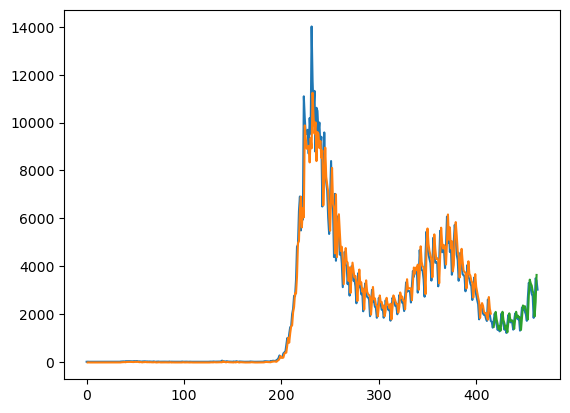

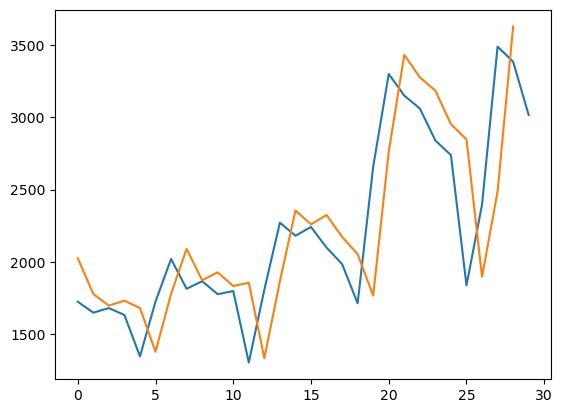

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taoyuan_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taoyuan_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('taoyuan_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taoyuan_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
42/42 [==============================] - 5s 33ms/step - loss: 0.0476 - mse: 0.0476 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3/5000
42/42 [===========================

42/42 [==============================] - 0s 7ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 7.9793e-04 - val_mse: 7.9793e-04
Epoch 56/5000
42/42 [==============================] - 0s 9ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 7.7785e-04 - val_mse: 7.7785e-04
Epoch 57/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 7.6747e-04 - val_mse: 7.6747e-04
Epoch 58/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.6473e-04 - val_mse: 7.6473e-04
Epoch 59/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 7.5458e-04 - val_mse: 7.5458e-04
Epoch 60/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.5519e-04 - val_mse: 7.5519e-04
Epoch 61/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.4962e-04 - val_mse: 7.4962e-04
Epoch 62/5000
42/42 [=====

42/42 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 6.7835e-04 - val_mse: 6.7835e-04
Epoch 114/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 6.8317e-04 - val_mse: 6.8317e-04
Epoch 115/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 6.8822e-04 - val_mse: 6.8822e-04
Epoch 116/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9134e-04 - val_mse: 6.9134e-04
Epoch 117/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.8798e-04 - val_mse: 6.8798e-04
Epoch 118/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9315e-04 - val_mse: 6.9315e-04
Epoch 119/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 6.9325e-04 - val_mse: 6.9325e-04
Epoch 120/5000
42/42 

Epoch 171/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4369e-04 - val_mse: 7.4369e-04
Epoch 172/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4771e-04 - val_mse: 7.4771e-04
Epoch 173/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5660e-04 - val_mse: 7.5660e-04
Epoch 174/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5453e-04 - val_mse: 7.5453e-04
Epoch 175/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4375e-04 - val_mse: 7.4375e-04
Epoch 176/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.4382e-04 - val_mse: 7.4382e-04
Epoch 177/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5501e-04 - val_mse: 7.5501e-04
Epoch 

Epoch 229/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5968e-04 - val_mse: 7.5968e-04
Epoch 230/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6681e-04 - val_mse: 7.6681e-04
Epoch 231/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.5795e-04 - val_mse: 7.5795e-04
Epoch 232/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6709e-04 - val_mse: 7.6709e-04
Epoch 233/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6580e-04 - val_mse: 7.6580e-04
Epoch 234/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6454e-04 - val_mse: 7.6454e-04
Epoch 235/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7289e-04 - val_mse: 7.7289e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6944e-04 - val_mse: 7.6944e-04
Epoch 287/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7011e-04 - val_mse: 7.7011e-04
Epoch 288/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.6579e-04 - val_mse: 7.6579e-04
Epoch 289/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6548e-04 - val_mse: 7.6548e-04
Epoch 290/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7691e-04 - val_mse: 7.7691e-04
Epoch 291/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6248e-04 - val_mse: 7.6248e-04
Epoch 292/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7491e-04 - val_mse: 7.7491e-04
Epoch 293/5000
42/42 

Epoch 344/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6996e-04 - val_mse: 7.6996e-04
Epoch 345/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6974e-04 - val_mse: 7.6974e-04
Epoch 346/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7038e-04 - val_mse: 7.7038e-04
Epoch 347/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6838e-04 - val_mse: 7.6838e-04
Epoch 348/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6330e-04 - val_mse: 7.6330e-04
Epoch 349/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6546e-04 - val_mse: 7.6546e-04
Epoch 350/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.8197e-04 - val_mse: 7.8197e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6404e-04 - val_mse: 7.6404e-04
Epoch 402/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6195e-04 - val_mse: 7.6195e-04
Epoch 403/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6126e-04 - val_mse: 7.6126e-04
Epoch 404/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7184e-04 - val_mse: 7.7184e-04
Epoch 405/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6972e-04 - val_mse: 7.6972e-04
Epoch 406/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6701e-04 - val_mse: 7.6701e-04
Epoch 407/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6622e-04 - val_mse: 7.6622e-04
Epoch 408/5000
42/42 

Epoch 459/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 7.7077e-04 - val_mse: 7.7077e-04
Epoch 460/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6195e-04 - val_mse: 7.6195e-04
Epoch 461/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6892e-04 - val_mse: 7.6892e-04
Epoch 462/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6674e-04 - val_mse: 7.6674e-04
Epoch 463/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6676e-04 - val_mse: 7.6676e-04
Epoch 464/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7354e-04 - val_mse: 7.7354e-04
Epoch 465/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6149e-04 - val_mse: 7.6149e-04
Epoch 

Epoch 517/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7643e-04 - val_mse: 7.7643e-04
Epoch 518/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6791e-04 - val_mse: 7.6791e-04
Epoch 519/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7627e-04 - val_mse: 7.7627e-04
Epoch 520/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7669e-04 - val_mse: 7.7669e-04
Epoch 521/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7004e-04 - val_mse: 7.7004e-04
Epoch 522/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6235e-04 - val_mse: 7.6235e-04
Epoch 523/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6488e-04 - val_mse: 7.6488e-04
Epoch 

Epoch 575/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6584e-04 - val_mse: 7.6584e-04
Epoch 576/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6963e-04 - val_mse: 7.6963e-04
Epoch 577/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6181e-04 - val_mse: 7.6181e-04
Epoch 578/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5543e-04 - val_mse: 7.5543e-04
Epoch 579/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6701e-04 - val_mse: 7.6701e-04
Epoch 580/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6809e-04 - val_mse: 7.6809e-04
Epoch 581/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5980e-04 - val_mse: 7.5980e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7009e-04 - val_mse: 7.7009e-04
Epoch 633/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6123e-04 - val_mse: 7.6123e-04
Epoch 634/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6420e-04 - val_mse: 7.6420e-04
Epoch 635/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6259e-04 - val_mse: 7.6259e-04
Epoch 636/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7013e-04 - val_mse: 7.7013e-04
Epoch 637/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6739e-04 - val_mse: 7.6739e-04
Epoch 638/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6430e-04 - val_mse: 7.6430e-04
Epoch 639/5000
42/42 

Epoch 690/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6574e-04 - val_mse: 7.6574e-04
Epoch 691/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6315e-04 - val_mse: 7.6315e-04
Epoch 692/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6812e-04 - val_mse: 7.6812e-04
Epoch 693/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6960e-04 - val_mse: 7.6960e-04
Epoch 694/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6443e-04 - val_mse: 7.6443e-04
Epoch 695/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7107e-04 - val_mse: 7.7107e-04
Epoch 696/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6088e-04 - val_mse: 7.6088e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6843e-04 - val_mse: 7.6843e-04
Epoch 748/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6939e-04 - val_mse: 7.6939e-04
Epoch 749/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6521e-04 - val_mse: 7.6521e-04
Epoch 750/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6811e-04 - val_mse: 7.6811e-04
Epoch 751/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6657e-04 - val_mse: 7.6657e-04
Epoch 752/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5834e-04 - val_mse: 7.5834e-04
Epoch 753/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6297e-04 - val_mse: 7.6297e-04
Epoch 754/5000
42/42 

Epoch 805/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6181e-04 - val_mse: 7.6181e-04
Epoch 806/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6640e-04 - val_mse: 7.6640e-04
Epoch 807/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6404e-04 - val_mse: 7.6404e-04
Epoch 808/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6360e-04 - val_mse: 7.6360e-04
Epoch 809/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6724e-04 - val_mse: 7.6724e-04
Epoch 810/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5971e-04 - val_mse: 7.5971e-04
Epoch 811/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6791e-04 - val_mse: 7.6791e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6453e-04 - val_mse: 7.6453e-04
Epoch 863/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7315e-04 - val_mse: 7.7315e-04
Epoch 864/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5934e-04 - val_mse: 7.5934e-04
Epoch 865/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6888e-04 - val_mse: 7.6888e-04
Epoch 866/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7528e-04 - val_mse: 7.7528e-04
Epoch 867/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7057e-04 - val_mse: 7.7057e-04
Epoch 868/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6431e-04 - val_mse: 7.6431e-04
Epoch 869/5000
42/42 

Epoch 920/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6012e-04 - val_mse: 7.6012e-04
Epoch 921/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7206e-04 - val_mse: 7.7206e-04
Epoch 922/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6438e-04 - val_mse: 7.6438e-04
Epoch 923/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6973e-04 - val_mse: 7.6973e-04
Epoch 924/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6179e-04 - val_mse: 7.6179e-04
Epoch 925/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7297e-04 - val_mse: 7.7297e-04
Epoch 926/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6435e-04 - val_mse: 7.6435e-04
Epoch 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6256e-04 - val_mse: 7.6256e-04
Epoch 978/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5841e-04 - val_mse: 7.5841e-04
Epoch 979/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7490e-04 - val_mse: 7.7490e-04
Epoch 980/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6362e-04 - val_mse: 7.6362e-04
Epoch 981/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6452e-04 - val_mse: 7.6452e-04
Epoch 982/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6556e-04 - val_mse: 7.6556e-04
Epoch 983/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6275e-04 - val_mse: 7.6275e-04
Epoch 984/5000
42/42 

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6317e-04 - val_mse: 7.6317e-04
Epoch 1035/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7104e-04 - val_mse: 7.7104e-04
Epoch 1036/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6917e-04 - val_mse: 7.6917e-04
Epoch 1037/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5762e-04 - val_mse: 7.5762e-04
Epoch 1038/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6451e-04 - val_mse: 7.6451e-04
Epoch 1039/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5699e-04 - val_mse: 7.5699e-04
Epoch 1040/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6128e-04 - val_mse: 7.6128e-04
Epoch 1041/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6521e-04 - val_mse: 7.6521e-04
Epoch 1092/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5787e-04 - val_mse: 7.5787e-04
Epoch 1093/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6381e-04 - val_mse: 7.6381e-04
Epoch 1094/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6225e-04 - val_mse: 7.6225e-04
Epoch 1095/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5957e-04 - val_mse: 7.5957e-04
Epoch 1096/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6229e-04 - val_mse: 7.6229e-04
Epoch 1097/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6697e-04 - val_mse: 7.6697e-04
Epoch 1098/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5910e-04 - val_mse: 7.5910e-04
Epoch 1149/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5793e-04 - val_mse: 7.5793e-04
Epoch 1150/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6319e-04 - val_mse: 7.6319e-04
Epoch 1151/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6330e-04 - val_mse: 7.6330e-04
Epoch 1152/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7030e-04 - val_mse: 7.7030e-04
Epoch 1153/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6273e-04 - val_mse: 7.6273e-04
Epoch 1154/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6299e-04 - val_mse: 7.6299e-04
Epoch 1155/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5862e-04 - val_mse: 7.5862e-04
Epoch 1206/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5897e-04 - val_mse: 7.5897e-04
Epoch 1207/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6402e-04 - val_mse: 7.6402e-04
Epoch 1208/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6144e-04 - val_mse: 7.6144e-04
Epoch 1209/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6407e-04 - val_mse: 7.6407e-04
Epoch 1210/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6876e-04 - val_mse: 7.6876e-04
Epoch 1211/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6382e-04 - val_mse: 7.6382e-04
Epoch 1212/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6285e-04 - val_mse: 7.6285e-04
Epoch 1263/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6114e-04 - val_mse: 7.6114e-04
Epoch 1264/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6092e-04 - val_mse: 7.6092e-04
Epoch 1265/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6314e-04 - val_mse: 7.6314e-04
Epoch 1266/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5926e-04 - val_mse: 7.5926e-04
Epoch 1267/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6278e-04 - val_mse: 7.6278e-04
Epoch 1268/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6842e-04 - val_mse: 7.6842e-04
Epoch 1269/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5972e-04 - val_mse: 7.5972e-04
Epoch 1320/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5585e-04 - val_mse: 7.5585e-04
Epoch 1321/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6005e-04 - val_mse: 7.6005e-04
Epoch 1322/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6198e-04 - val_mse: 7.6198e-04
Epoch 1323/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5825e-04 - val_mse: 7.5825e-04
Epoch 1324/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6035e-04 - val_mse: 7.6035e-04
Epoch 1325/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6009e-04 - val_mse: 7.6009e-04
Epoch 1326/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5942e-04 - val_mse: 7.5942e-04
Epoch 1377/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5525e-04 - val_mse: 7.5525e-04
Epoch 1378/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6680e-04 - val_mse: 7.6680e-04
Epoch 1379/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6288e-04 - val_mse: 7.6288e-04
Epoch 1380/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5799e-04 - val_mse: 7.5799e-04
Epoch 1381/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5932e-04 - val_mse: 7.5932e-04
Epoch 1382/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5938e-04 - val_mse: 7.5938e-04
Epoch 1383/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6548e-04 - val_mse: 7.6548e-04
Epoch 1434/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6392e-04 - val_mse: 7.6392e-04
Epoch 1435/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6380e-04 - val_mse: 7.6380e-04
Epoch 1436/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6249e-04 - val_mse: 7.6249e-04
Epoch 1437/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6199e-04 - val_mse: 7.6199e-04
Epoch 1438/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6470e-04 - val_mse: 7.6470e-04
Epoch 1439/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6027e-04 - val_mse: 7.6027e-04
Epoch 1440/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6054e-04 - val_mse: 7.6054e-04
Epoch 1491/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6325e-04 - val_mse: 7.6325e-04
Epoch 1492/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5680e-04 - val_mse: 7.5680e-04
Epoch 1493/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6122e-04 - val_mse: 7.6122e-04
Epoch 1494/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5893e-04 - val_mse: 7.5893e-04
Epoch 1495/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6029e-04 - val_mse: 7.6029e-04
Epoch 1496/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6271e-04 - val_mse: 7.6271e-04
Epoch 1497/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5329e-04 - val_mse: 7.5329e-04
Epoch 1548/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6532e-04 - val_mse: 7.6532e-04
Epoch 1549/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6892e-04 - val_mse: 7.6892e-04
Epoch 1550/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7111e-04 - val_mse: 7.7111e-04
Epoch 1551/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5948e-04 - val_mse: 7.5948e-04
Epoch 1552/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5921e-04 - val_mse: 7.5921e-04
Epoch 1553/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7012e-04 - val_mse: 7.7012e-04
Epoch 1554/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5666e-04 - val_mse: 7.5666e-04
Epoch 1605/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.7557e-04 - val_mse: 7.7557e-04
Epoch 1606/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5500e-04 - val_mse: 7.5500e-04
Epoch 1607/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5831e-04 - val_mse: 7.5831e-04
Epoch 1608/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6402e-04 - val_mse: 7.6402e-04
Epoch 1609/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5881e-04 - val_mse: 7.5881e-04
Epoch 1610/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5819e-04 - val_mse: 7.5819e-04
Epoch 1611/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6034e-04 - val_mse: 7.6034e-04
Epoch 1662/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6144e-04 - val_mse: 7.6144e-04
Epoch 1663/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6006e-04 - val_mse: 7.6006e-04
Epoch 1664/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6223e-04 - val_mse: 7.6223e-04
Epoch 1665/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6024e-04 - val_mse: 7.6024e-04
Epoch 1666/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5884e-04 - val_mse: 7.5884e-04
Epoch 1667/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5960e-04 - val_mse: 7.5960e-04
Epoch 1668/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6316e-04 - val_mse: 7.6316e-04
Epoch 1719/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6247e-04 - val_mse: 7.6247e-04
Epoch 1720/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6304e-04 - val_mse: 7.6304e-04
Epoch 1721/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5661e-04 - val_mse: 7.5661e-04
Epoch 1722/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5673e-04 - val_mse: 7.5673e-04
Epoch 1723/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6215e-04 - val_mse: 7.6215e-04
Epoch 1724/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5924e-04 - val_mse: 7.5924e-04
Epoch 1725/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5555e-04 - val_mse: 7.5555e-04
Epoch 1776/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5515e-04 - val_mse: 7.5515e-04
Epoch 1777/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5839e-04 - val_mse: 7.5839e-04
Epoch 1778/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5859e-04 - val_mse: 7.5859e-04
Epoch 1779/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6058e-04 - val_mse: 7.6058e-04
Epoch 1780/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6058e-04 - val_mse: 7.6058e-04
Epoch 1781/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6281e-04 - val_mse: 7.6281e-04
Epoch 1782/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5910e-04 - val_mse: 7.5910e-04
Epoch 1833/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6090e-04 - val_mse: 7.6090e-04
Epoch 1834/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6112e-04 - val_mse: 7.6112e-04
Epoch 1835/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6455e-04 - val_mse: 7.6455e-04
Epoch 1836/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5382e-04 - val_mse: 7.5382e-04
Epoch 1837/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5516e-04 - val_mse: 7.5516e-04
Epoch 1838/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6150e-04 - val_mse: 7.6150e-04
Epoch 1839/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5740e-04 - val_mse: 7.5740e-04
Epoch 1890/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5921e-04 - val_mse: 7.5921e-04
Epoch 1891/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5559e-04 - val_mse: 7.5559e-04
Epoch 1892/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6402e-04 - val_mse: 7.6402e-04
Epoch 1893/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5449e-04 - val_mse: 7.5449e-04
Epoch 1894/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6589e-04 - val_mse: 7.6589e-04
Epoch 1895/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6394e-04 - val_mse: 7.6394e-04
Epoch 1896/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5988e-04 - val_mse: 7.5988e-04
Epoch 1947/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6271e-04 - val_mse: 7.6271e-04
Epoch 1948/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6224e-04 - val_mse: 7.6224e-04
Epoch 1949/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5789e-04 - val_mse: 7.5789e-04
Epoch 1950/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6811e-04 - val_mse: 7.6811e-04
Epoch 1951/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6054e-04 - val_mse: 7.6054e-04
Epoch 1952/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5902e-04 - val_mse: 7.5902e-04
Epoch 1953/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5285e-04 - val_mse: 7.5285e-04
Epoch 2004/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5568e-04 - val_mse: 7.5568e-04
Epoch 2005/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5562e-04 - val_mse: 7.5562e-04
Epoch 2006/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6100e-04 - val_mse: 7.6100e-04
Epoch 2007/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5866e-04 - val_mse: 7.5866e-04
Epoch 2008/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5596e-04 - val_mse: 7.5596e-04
Epoch 2009/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6083e-04 - val_mse: 7.6083e-04
Epoch 2010/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5357e-04 - val_mse: 7.5357e-04
Epoch 2061/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5465e-04 - val_mse: 7.5465e-04
Epoch 2062/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5582e-04 - val_mse: 7.5582e-04
Epoch 2063/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5772e-04 - val_mse: 7.5772e-04
Epoch 2064/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6077e-04 - val_mse: 7.6077e-04
Epoch 2065/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5848e-04 - val_mse: 7.5848e-04
Epoch 2066/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6462e-04 - val_mse: 7.6462e-04
Epoch 2067/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5193e-04 - val_mse: 7.5193e-04
Epoch 2118/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5796e-04 - val_mse: 7.5796e-04
Epoch 2119/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5920e-04 - val_mse: 7.5920e-04
Epoch 2120/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5659e-04 - val_mse: 7.5659e-04
Epoch 2121/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5569e-04 - val_mse: 7.5569e-04
Epoch 2122/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6111e-04 - val_mse: 7.6111e-04
Epoch 2123/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6104e-04 - val_mse: 7.6104e-04
Epoch 2124/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5525e-04 - val_mse: 7.5525e-04
Epoch 2175/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5935e-04 - val_mse: 7.5935e-04
Epoch 2176/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5573e-04 - val_mse: 7.5573e-04
Epoch 2177/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6118e-04 - val_mse: 7.6118e-04
Epoch 2178/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5663e-04 - val_mse: 7.5663e-04
Epoch 2179/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5596e-04 - val_mse: 7.5596e-04
Epoch 2180/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5958e-04 - val_mse: 7.5958e-04
Epoch 2181/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5449e-04 - val_mse: 7.5449e-04
Epoch 2232/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6306e-04 - val_mse: 7.6306e-04
Epoch 2233/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6528e-04 - val_mse: 7.6528e-04
Epoch 2234/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6322e-04 - val_mse: 7.6322e-04
Epoch 2235/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6344e-04 - val_mse: 7.6344e-04
Epoch 2236/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6076e-04 - val_mse: 7.6076e-04
Epoch 2237/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5886e-04 - val_mse: 7.5886e-04
Epoch 2238/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5286e-04 - val_mse: 7.5286e-04
Epoch 2289/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6215e-04 - val_mse: 7.6215e-04
Epoch 2290/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6073e-04 - val_mse: 7.6073e-04
Epoch 2291/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5775e-04 - val_mse: 7.5775e-04
Epoch 2292/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5378e-04 - val_mse: 7.5378e-04
Epoch 2293/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5483e-04 - val_mse: 7.5483e-04
Epoch 2294/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5819e-04 - val_mse: 7.5819e-04
Epoch 2295/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5521e-04 - val_mse: 7.5521e-04
Epoch 2346/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5291e-04 - val_mse: 7.5291e-04
Epoch 2347/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5858e-04 - val_mse: 7.5858e-04
Epoch 2348/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5450e-04 - val_mse: 7.5450e-04
Epoch 2349/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5728e-04 - val_mse: 7.5728e-04
Epoch 2350/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5299e-04 - val_mse: 7.5299e-04
Epoch 2351/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5285e-04 - val_mse: 7.5285e-04
Epoch 2352/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5577e-04 - val_mse: 7.5577e-04
Epoch 2403/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5211e-04 - val_mse: 7.5211e-04
Epoch 2404/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5480e-04 - val_mse: 7.5480e-04
Epoch 2405/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5592e-04 - val_mse: 7.5592e-04
Epoch 2406/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6010e-04 - val_mse: 7.6010e-04
Epoch 2407/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5867e-04 - val_mse: 7.5867e-04
Epoch 2408/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5848e-04 - val_mse: 7.5848e-04
Epoch 2409/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5402e-04 - val_mse: 7.5402e-04
Epoch 2460/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6057e-04 - val_mse: 7.6057e-04
Epoch 2461/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5467e-04 - val_mse: 7.5467e-04
Epoch 2462/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5574e-04 - val_mse: 7.5574e-04
Epoch 2463/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5564e-04 - val_mse: 7.5564e-04
Epoch 2464/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5615e-04 - val_mse: 7.5615e-04
Epoch 2465/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6016e-04 - val_mse: 7.6016e-04
Epoch 2466/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5844e-04 - val_mse: 7.5844e-04
Epoch 2517/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5811e-04 - val_mse: 7.5811e-04
Epoch 2518/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5423e-04 - val_mse: 7.5423e-04
Epoch 2519/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6159e-04 - val_mse: 7.6159e-04
Epoch 2520/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5275e-04 - val_mse: 7.5275e-04
Epoch 2521/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5450e-04 - val_mse: 7.5450e-04
Epoch 2522/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5548e-04 - val_mse: 7.5548e-04
Epoch 2523/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6923e-04 - val_mse: 7.6923e-04
Epoch 2574/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6016e-04 - val_mse: 7.6016e-04
Epoch 2575/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6278e-04 - val_mse: 7.6278e-04
Epoch 2576/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5190e-04 - val_mse: 7.5190e-04
Epoch 2577/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5221e-04 - val_mse: 7.5221e-04
Epoch 2578/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5140e-04 - val_mse: 7.5140e-04
Epoch 2579/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5799e-04 - val_mse: 7.5799e-04
Epoch 2580/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5199e-04 - val_mse: 7.5199e-04
Epoch 2631/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5281e-04 - val_mse: 7.5281e-04
Epoch 2632/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5496e-04 - val_mse: 7.5496e-04
Epoch 2633/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5646e-04 - val_mse: 7.5646e-04
Epoch 2634/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5855e-04 - val_mse: 7.5855e-04
Epoch 2635/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5146e-04 - val_mse: 7.5146e-04
Epoch 2636/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5618e-04 - val_mse: 7.5618e-04
Epoch 2637/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4839e-04 - val_mse: 7.4839e-04
Epoch 2688/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4719e-04 - val_mse: 7.4719e-04
Epoch 2689/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5615e-04 - val_mse: 7.5615e-04
Epoch 2690/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5323e-04 - val_mse: 7.5323e-04
Epoch 2691/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5269e-04 - val_mse: 7.5269e-04
Epoch 2692/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4995e-04 - val_mse: 7.4995e-04
Epoch 2693/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5493e-04 - val_mse: 7.5493e-04
Epoch 2694/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5957e-04 - val_mse: 7.5957e-04
Epoch 2745/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5092e-04 - val_mse: 7.5092e-04
Epoch 2746/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5731e-04 - val_mse: 7.5731e-04
Epoch 2747/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5032e-04 - val_mse: 7.5032e-04
Epoch 2748/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4856e-04 - val_mse: 7.4856e-04
Epoch 2749/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5036e-04 - val_mse: 7.5036e-04
Epoch 2750/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5266e-04 - val_mse: 7.5266e-04
Epoch 2751/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5093e-04 - val_mse: 7.5093e-04
Epoch 2802/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5068e-04 - val_mse: 7.5068e-04
Epoch 2803/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5125e-04 - val_mse: 7.5125e-04
Epoch 2804/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5259e-04 - val_mse: 7.5259e-04
Epoch 2805/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5422e-04 - val_mse: 7.5422e-04
Epoch 2806/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5525e-04 - val_mse: 7.5525e-04
Epoch 2807/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5843e-04 - val_mse: 7.5843e-04
Epoch 2808/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6017e-04 - val_mse: 7.6017e-04
Epoch 2859/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5660e-04 - val_mse: 7.5660e-04
Epoch 2860/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5051e-04 - val_mse: 7.5051e-04
Epoch 2861/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5646e-04 - val_mse: 7.5646e-04
Epoch 2862/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5815e-04 - val_mse: 7.5815e-04
Epoch 2863/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5502e-04 - val_mse: 7.5502e-04
Epoch 2864/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5316e-04 - val_mse: 7.5316e-04
Epoch 2865/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5201e-04 - val_mse: 7.5201e-04
Epoch 2916/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5052e-04 - val_mse: 7.5052e-04
Epoch 2917/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5790e-04 - val_mse: 7.5790e-04
Epoch 2918/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5025e-04 - val_mse: 7.5025e-04
Epoch 2919/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6001e-04 - val_mse: 7.6001e-04
Epoch 2920/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5184e-04 - val_mse: 7.5184e-04
Epoch 2921/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5567e-04 - val_mse: 7.5567e-04
Epoch 2922/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5292e-04 - val_mse: 7.5292e-04
Epoch 2973/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5443e-04 - val_mse: 7.5443e-04
Epoch 2974/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5425e-04 - val_mse: 7.5425e-04
Epoch 2975/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5090e-04 - val_mse: 7.5090e-04
Epoch 2976/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5318e-04 - val_mse: 7.5318e-04
Epoch 2977/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5839e-04 - val_mse: 7.5839e-04
Epoch 2978/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5495e-04 - val_mse: 7.5495e-04
Epoch 2979/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5865e-04 - val_mse: 7.5865e-04
Epoch 3030/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5468e-04 - val_mse: 7.5468e-04
Epoch 3031/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5525e-04 - val_mse: 7.5525e-04
Epoch 3032/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5418e-04 - val_mse: 7.5418e-04
Epoch 3033/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5313e-04 - val_mse: 7.5313e-04
Epoch 3034/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5031e-04 - val_mse: 7.5031e-04
Epoch 3035/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5619e-04 - val_mse: 7.5619e-04
Epoch 3036/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4946e-04 - val_mse: 7.4946e-04
Epoch 3087/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6148e-04 - val_mse: 7.6148e-04
Epoch 3088/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5490e-04 - val_mse: 7.5490e-04
Epoch 3089/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5206e-04 - val_mse: 7.5206e-04
Epoch 3090/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5686e-04 - val_mse: 7.5686e-04
Epoch 3091/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5919e-04 - val_mse: 7.5919e-04
Epoch 3092/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5494e-04 - val_mse: 7.5494e-04
Epoch 3093/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5025e-04 - val_mse: 7.5025e-04
Epoch 3144/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5195e-04 - val_mse: 7.5195e-04
Epoch 3145/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5188e-04 - val_mse: 7.5188e-04
Epoch 3146/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5432e-04 - val_mse: 7.5432e-04
Epoch 3147/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5488e-04 - val_mse: 7.5488e-04
Epoch 3148/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5011e-04 - val_mse: 7.5011e-04
Epoch 3149/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4816e-04 - val_mse: 7.4816e-04
Epoch 3150/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5313e-04 - val_mse: 7.5313e-04
Epoch 3201/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5063e-04 - val_mse: 7.5063e-04
Epoch 3202/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4986e-04 - val_mse: 7.4986e-04
Epoch 3203/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4983e-04 - val_mse: 7.4983e-04
Epoch 3204/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5357e-04 - val_mse: 7.5357e-04
Epoch 3205/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5052e-04 - val_mse: 7.5052e-04
Epoch 3206/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5169e-04 - val_mse: 7.5169e-04
Epoch 3207/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5232e-04 - val_mse: 7.5232e-04
Epoch 3258/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5119e-04 - val_mse: 7.5119e-04
Epoch 3259/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5339e-04 - val_mse: 7.5339e-04
Epoch 3260/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4884e-04 - val_mse: 7.4884e-04
Epoch 3261/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4861e-04 - val_mse: 7.4861e-04
Epoch 3262/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5869e-04 - val_mse: 7.5869e-04
Epoch 3263/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4836e-04 - val_mse: 7.4836e-04
Epoch 3264/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5351e-04 - val_mse: 7.5351e-04
Epoch 3315/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5313e-04 - val_mse: 7.5313e-04
Epoch 3316/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5071e-04 - val_mse: 7.5071e-04
Epoch 3317/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4816e-04 - val_mse: 7.4816e-04
Epoch 3318/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5490e-04 - val_mse: 7.5490e-04
Epoch 3319/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5299e-04 - val_mse: 7.5299e-04
Epoch 3320/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5053e-04 - val_mse: 7.5053e-04
Epoch 3321/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5002e-04 - val_mse: 7.5002e-04
Epoch 3372/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5520e-04 - val_mse: 7.5520e-04
Epoch 3373/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5515e-04 - val_mse: 7.5515e-04
Epoch 3374/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5706e-04 - val_mse: 7.5706e-04
Epoch 3375/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4985e-04 - val_mse: 7.4985e-04
Epoch 3376/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5207e-04 - val_mse: 7.5207e-04
Epoch 3377/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4767e-04 - val_mse: 7.4767e-04
Epoch 3378/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5364e-04 - val_mse: 7.5364e-04
Epoch 3429/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4973e-04 - val_mse: 7.4973e-04
Epoch 3430/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5466e-04 - val_mse: 7.5466e-04
Epoch 3431/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5385e-04 - val_mse: 7.5385e-04
Epoch 3432/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4915e-04 - val_mse: 7.4915e-04
Epoch 3433/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4708e-04 - val_mse: 7.4708e-04
Epoch 3434/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4681e-04 - val_mse: 7.4681e-04
Epoch 3435/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4887e-04 - val_mse: 7.4887e-04
Epoch 3486/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5063e-04 - val_mse: 7.5063e-04
Epoch 3487/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5038e-04 - val_mse: 7.5038e-04
Epoch 3488/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5134e-04 - val_mse: 7.5134e-04
Epoch 3489/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5325e-04 - val_mse: 7.5325e-04
Epoch 3490/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4725e-04 - val_mse: 7.4725e-04
Epoch 3491/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5317e-04 - val_mse: 7.5317e-04
Epoch 3492/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4894e-04 - val_mse: 7.4894e-04
Epoch 3543/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5063e-04 - val_mse: 7.5063e-04
Epoch 3544/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5584e-04 - val_mse: 7.5584e-04
Epoch 3545/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5131e-04 - val_mse: 7.5131e-04
Epoch 3546/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4789e-04 - val_mse: 7.4789e-04
Epoch 3547/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5137e-04 - val_mse: 7.5137e-04
Epoch 3548/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5432e-04 - val_mse: 7.5432e-04
Epoch 3549/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5232e-04 - val_mse: 7.5232e-04
Epoch 3600/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4971e-04 - val_mse: 7.4971e-04
Epoch 3601/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4725e-04 - val_mse: 7.4725e-04
Epoch 3602/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5171e-04 - val_mse: 7.5171e-04
Epoch 3603/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5023e-04 - val_mse: 7.5023e-04
Epoch 3604/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5059e-04 - val_mse: 7.5059e-04
Epoch 3605/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5208e-04 - val_mse: 7.5208e-04
Epoch 3606/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4884e-04 - val_mse: 7.4884e-04
Epoch 3657/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4859e-04 - val_mse: 7.4859e-04
Epoch 3658/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5346e-04 - val_mse: 7.5346e-04
Epoch 3659/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4973e-04 - val_mse: 7.4973e-04
Epoch 3660/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5068e-04 - val_mse: 7.5068e-04
Epoch 3661/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4987e-04 - val_mse: 7.4987e-04
Epoch 3662/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5023e-04 - val_mse: 7.5023e-04
Epoch 3663/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5275e-04 - val_mse: 7.5275e-04
Epoch 3714/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5141e-04 - val_mse: 7.5141e-04
Epoch 3715/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5083e-04 - val_mse: 7.5083e-04
Epoch 3716/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5210e-04 - val_mse: 7.5210e-04
Epoch 3717/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4522e-04 - val_mse: 7.4522e-04
Epoch 3718/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4977e-04 - val_mse: 7.4977e-04
Epoch 3719/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5734e-04 - val_mse: 7.5734e-04
Epoch 3720/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4924e-04 - val_mse: 7.4924e-04
Epoch 3771/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5175e-04 - val_mse: 7.5175e-04
Epoch 3772/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4987e-04 - val_mse: 7.4987e-04
Epoch 3773/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4857e-04 - val_mse: 7.4857e-04
Epoch 3774/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4696e-04 - val_mse: 7.4696e-04
Epoch 3775/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4944e-04 - val_mse: 7.4944e-04
Epoch 3776/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4881e-04 - val_mse: 7.4881e-04
Epoch 3777/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5796e-04 - val_mse: 7.5796e-04
Epoch 3828/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5029e-04 - val_mse: 7.5029e-04
Epoch 3829/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4571e-04 - val_mse: 7.4571e-04
Epoch 3830/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4498e-04 - val_mse: 7.4498e-04
Epoch 3831/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5358e-04 - val_mse: 7.5358e-04
Epoch 3832/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5016e-04 - val_mse: 7.5016e-04
Epoch 3833/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4738e-04 - val_mse: 7.4738e-04
Epoch 3834/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5047e-04 - val_mse: 7.5047e-04
Epoch 3885/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4743e-04 - val_mse: 7.4743e-04
Epoch 3886/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4905e-04 - val_mse: 7.4905e-04
Epoch 3887/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4891e-04 - val_mse: 7.4891e-04
Epoch 3888/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4724e-04 - val_mse: 7.4724e-04
Epoch 3889/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5138e-04 - val_mse: 7.5138e-04
Epoch 3890/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5422e-04 - val_mse: 7.5422e-04
Epoch 3891/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4463e-04 - val_mse: 7.4463e-04
Epoch 3942/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5258e-04 - val_mse: 7.5258e-04
Epoch 3943/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4828e-04 - val_mse: 7.4828e-04
Epoch 3944/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5244e-04 - val_mse: 7.5244e-04
Epoch 3945/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4897e-04 - val_mse: 7.4897e-04
Epoch 3946/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5044e-04 - val_mse: 7.5044e-04
Epoch 3947/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4630e-04 - val_mse: 7.4630e-04
Epoch 3948/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4732e-04 - val_mse: 7.4732e-04
Epoch 3999/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4909e-04 - val_mse: 7.4909e-04
Epoch 4000/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5379e-04 - val_mse: 7.5379e-04
Epoch 4001/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5280e-04 - val_mse: 7.5280e-04
Epoch 4002/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5441e-04 - val_mse: 7.5441e-04
Epoch 4003/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5067e-04 - val_mse: 7.5067e-04
Epoch 4004/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4826e-04 - val_mse: 7.4826e-04
Epoch 4005/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4807e-04 - val_mse: 7.4807e-04
Epoch 4056/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5092e-04 - val_mse: 7.5092e-04
Epoch 4057/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5173e-04 - val_mse: 7.5173e-04
Epoch 4058/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4622e-04 - val_mse: 7.4622e-04
Epoch 4059/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4734e-04 - val_mse: 7.4734e-04
Epoch 4060/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4996e-04 - val_mse: 7.4996e-04
Epoch 4061/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5231e-04 - val_mse: 7.5231e-04
Epoch 4062/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4620e-04 - val_mse: 7.4620e-04
Epoch 4113/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4683e-04 - val_mse: 7.4683e-04
Epoch 4114/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4630e-04 - val_mse: 7.4630e-04
Epoch 4115/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4898e-04 - val_mse: 7.4898e-04
Epoch 4116/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4687e-04 - val_mse: 7.4687e-04
Epoch 4117/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4830e-04 - val_mse: 7.4830e-04
Epoch 4118/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4590e-04 - val_mse: 7.4590e-04
Epoch 4119/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5473e-04 - val_mse: 7.5473e-04
Epoch 4170/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5004e-04 - val_mse: 7.5004e-04
Epoch 4171/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4874e-04 - val_mse: 7.4874e-04
Epoch 4172/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4424e-04 - val_mse: 7.4424e-04
Epoch 4173/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4374e-04 - val_mse: 7.4374e-04
Epoch 4174/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5096e-04 - val_mse: 7.5096e-04
Epoch 4175/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4979e-04 - val_mse: 7.4979e-04
Epoch 4176/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4112e-04 - val_mse: 7.4112e-04
Epoch 4227/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5407e-04 - val_mse: 7.5407e-04
Epoch 4228/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4870e-04 - val_mse: 7.4870e-04
Epoch 4229/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4343e-04 - val_mse: 7.4343e-04
Epoch 4230/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4510e-04 - val_mse: 7.4510e-04
Epoch 4231/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4796e-04 - val_mse: 7.4796e-04
Epoch 4232/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4933e-04 - val_mse: 7.4933e-04
Epoch 4233/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4719e-04 - val_mse: 7.4719e-04
Epoch 4284/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4642e-04 - val_mse: 7.4642e-04
Epoch 4285/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4409e-04 - val_mse: 7.4409e-04
Epoch 4286/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4541e-04 - val_mse: 7.4541e-04
Epoch 4287/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4522e-04 - val_mse: 7.4522e-04
Epoch 4288/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5355e-04 - val_mse: 7.5355e-04
Epoch 4289/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4649e-04 - val_mse: 7.4649e-04
Epoch 4290/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4927e-04 - val_mse: 7.4927e-04
Epoch 4341/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5020e-04 - val_mse: 7.5020e-04
Epoch 4342/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4366e-04 - val_mse: 7.4366e-04
Epoch 4343/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4930e-04 - val_mse: 7.4930e-04
Epoch 4344/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5486e-04 - val_mse: 7.5486e-04
Epoch 4345/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4785e-04 - val_mse: 7.4785e-04
Epoch 4346/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4643e-04 - val_mse: 7.4643e-04
Epoch 4347/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4232e-04 - val_mse: 7.4232e-04
Epoch 4398/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4339e-04 - val_mse: 7.4339e-04
Epoch 4399/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4662e-04 - val_mse: 7.4662e-04
Epoch 4400/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4662e-04 - val_mse: 7.4662e-04
Epoch 4401/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5288e-04 - val_mse: 7.5288e-04
Epoch 4402/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4792e-04 - val_mse: 7.4792e-04
Epoch 4403/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5139e-04 - val_mse: 7.5139e-04
Epoch 4404/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4894e-04 - val_mse: 7.4894e-04
Epoch 4455/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4952e-04 - val_mse: 7.4952e-04
Epoch 4456/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4851e-04 - val_mse: 7.4851e-04
Epoch 4457/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4413e-04 - val_mse: 7.4413e-04
Epoch 4458/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4777e-04 - val_mse: 7.4777e-04
Epoch 4459/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4397e-04 - val_mse: 7.4397e-04
Epoch 4460/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4792e-04 - val_mse: 7.4792e-04
Epoch 4461/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4831e-04 - val_mse: 7.4831e-04
Epoch 4512/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4995e-04 - val_mse: 7.4995e-04
Epoch 4513/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4837e-04 - val_mse: 7.4837e-04
Epoch 4514/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4980e-04 - val_mse: 7.4980e-04
Epoch 4515/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4676e-04 - val_mse: 7.4676e-04
Epoch 4516/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4635e-04 - val_mse: 7.4635e-04
Epoch 4517/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4778e-04 - val_mse: 7.4778e-04
Epoch 4518/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4989e-04 - val_mse: 7.4989e-04
Epoch 4569/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4708e-04 - val_mse: 7.4708e-04
Epoch 4570/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5096e-04 - val_mse: 7.5096e-04
Epoch 4571/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4837e-04 - val_mse: 7.4837e-04
Epoch 4572/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5026e-04 - val_mse: 7.5026e-04
Epoch 4573/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4883e-04 - val_mse: 7.4883e-04
Epoch 4574/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4867e-04 - val_mse: 7.4867e-04
Epoch 4575/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4871e-04 - val_mse: 7.4870e-04
Epoch 4626/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4967e-04 - val_mse: 7.4967e-04
Epoch 4627/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4366e-04 - val_mse: 7.4366e-04
Epoch 4628/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5300e-04 - val_mse: 7.5300e-04
Epoch 4629/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4508e-04 - val_mse: 7.4508e-04
Epoch 4630/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4579e-04 - val_mse: 7.4579e-04
Epoch 4631/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4406e-04 - val_mse: 7.4406e-04
Epoch 4632/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4739e-04 - val_mse: 7.4739e-04
Epoch 4683/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4279e-04 - val_mse: 7.4279e-04
Epoch 4684/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4964e-04 - val_mse: 7.4964e-04
Epoch 4685/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5023e-04 - val_mse: 7.5023e-04
Epoch 4686/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4838e-04 - val_mse: 7.4838e-04
Epoch 4687/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4562e-04 - val_mse: 7.4562e-04
Epoch 4688/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4235e-04 - val_mse: 7.4235e-04
Epoch 4689/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5126e-04 - val_mse: 7.5126e-04
Epoch 4740/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4266e-04 - val_mse: 7.4266e-04
Epoch 4741/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4430e-04 - val_mse: 7.4430e-04
Epoch 4742/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4788e-04 - val_mse: 7.4788e-04
Epoch 4743/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5002e-04 - val_mse: 7.5002e-04
Epoch 4744/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4240e-04 - val_mse: 7.4240e-04
Epoch 4745/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4472e-04 - val_mse: 7.4472e-04
Epoch 4746/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4989e-04 - val_mse: 7.4989e-04
Epoch 4797/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4300e-04 - val_mse: 7.4300e-04
Epoch 4798/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4636e-04 - val_mse: 7.4636e-04
Epoch 4799/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4547e-04 - val_mse: 7.4547e-04
Epoch 4800/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4494e-04 - val_mse: 7.4494e-04
Epoch 4801/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4587e-04 - val_mse: 7.4587e-04
Epoch 4802/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4595e-04 - val_mse: 7.4595e-04
Epoch 4803/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5068e-04 - val_mse: 7.5068e-04
Epoch 4854/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4948e-04 - val_mse: 7.4948e-04
Epoch 4855/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4394e-04 - val_mse: 7.4393e-04
Epoch 4856/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4601e-04 - val_mse: 7.4601e-04
Epoch 4857/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4171e-04 - val_mse: 7.4171e-04
Epoch 4858/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4985e-04 - val_mse: 7.4985e-04
Epoch 4859/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4332e-04 - val_mse: 7.4332e-04
Epoch 4860/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4514e-04 - val_mse: 7.4514e-04
Epoch 4911/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5209e-04 - val_mse: 7.5209e-04
Epoch 4912/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4997e-04 - val_mse: 7.4997e-04
Epoch 4913/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4462e-04 - val_mse: 7.4462e-04
Epoch 4914/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4308e-04 - val_mse: 7.4308e-04
Epoch 4915/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4634e-04 - val_mse: 7.4634e-04
Epoch 4916/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4940e-04 - val_mse: 7.4940e-04
Epoch 4917/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4736e-04 - val_mse: 7.4736e-04
Epoch 4968/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4656e-04 - val_mse: 7.4656e-04
Epoch 4969/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4677e-04 - val_mse: 7.4677e-04
Epoch 4970/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3981e-04 - val_mse: 7.3981e-04
Epoch 4971/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4715e-04 - val_mse: 7.4715e-04
Epoch 4972/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5203e-04 - val_mse: 7.5203e-04
Epoch 4973/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4367e-04 - val_mse: 7.4367e-04
Epoch 4974/5000

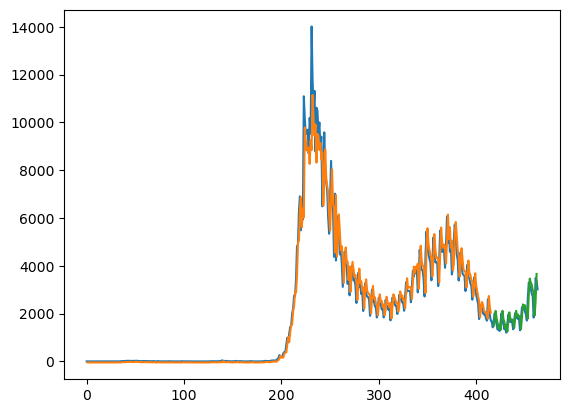

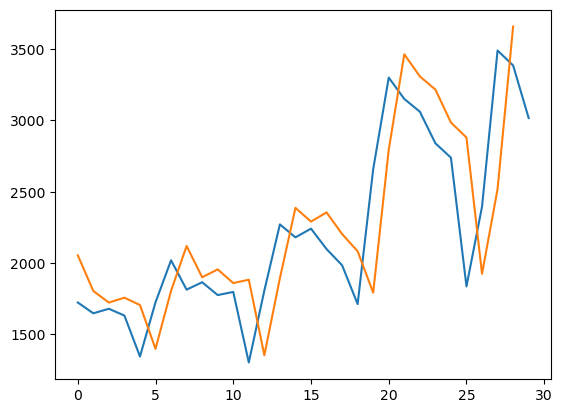

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taoyuan_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taoyuan_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('taoyuan_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taoyuan_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

42/42 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 54/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 55/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 56/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 57/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 58/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 59/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 60/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0029 -

42/42 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 116/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 117/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 118/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 120/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 121/5000
42/42 [==============================] - 0s 8ms/step - loss: 0

42/42 [==============================] - 0s 11ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.2469e-04 - val_mse: 8.2469e-04
Epoch 173/5000
42/42 [==============================] - 1s 13ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.0997e-04 - val_mse: 8.0997e-04
Epoch 174/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3929e-04 - val_mse: 8.3929e-04
Epoch 175/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.5953e-04 - val_mse: 8.5953e-04
Epoch 176/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3119e-04 - val_mse: 8.3119e-04
Epoch 177/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.1893e-04 - val_mse: 8.1893e-04
Epoch 178/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 8.3523e-04 - val_mse: 8.3523e-04
Epoch 179/5000
42/4

Epoch 230/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5841e-04 - val_mse: 7.5841e-04
Epoch 231/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5914e-04 - val_mse: 7.5914e-04
Epoch 232/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.6149e-04 - val_mse: 7.6149e-04
Epoch 233/5000
42/42 [==============================] - 1s 13ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5070e-04 - val_mse: 7.5070e-04
Epoch 234/5000
42/42 [==============================] - 1s 16ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4703e-04 - val_mse: 7.4703e-04
Epoch 235/5000
42/42 [==============================] - 0s 6ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5081e-04 - val_mse: 7.5081e-04
Epoch 236/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.5041e-04 - val_mse: 7.5041e-04
Epoc

42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3452e-04 - val_mse: 7.3452e-04
Epoch 288/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.4056e-04 - val_mse: 7.4056e-04
Epoch 289/5000
42/42 [==============================] - 0s 11ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3224e-04 - val_mse: 7.3224e-04
Epoch 290/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3463e-04 - val_mse: 7.3463e-04
Epoch 291/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3481e-04 - val_mse: 7.3481e-04
Epoch 292/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3282e-04 - val_mse: 7.3282e-04
Epoch 293/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.3304e-04 - val_mse: 7.3304e-04
Epoch 294/5000
42/42

Epoch 345/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2894e-04 - val_mse: 7.2894e-04
Epoch 346/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2625e-04 - val_mse: 7.2625e-04
Epoch 347/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2377e-04 - val_mse: 7.2377e-04
Epoch 348/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2303e-04 - val_mse: 7.2303e-04
Epoch 349/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2335e-04 - val_mse: 7.2335e-04
Epoch 350/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 7.2765e-04 - val_mse: 7.2765e-04
Epoch 351/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2301e-04 - val_mse: 7.2301e-04
Epo

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1491e-04 - val_mse: 7.1491e-04
Epoch 403/5000
42/42 [==============================] - 0s 10ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1245e-04 - val_mse: 7.1245e-04
Epoch 404/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2914e-04 - val_mse: 7.2914e-04
Epoch 405/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1275e-04 - val_mse: 7.1275e-04
Epoch 406/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1444e-04 - val_mse: 7.1444e-04
Epoch 407/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2000e-04 - val_mse: 7.2000e-04
Epoch 408/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2441e-04 - val_mse: 7.2441e-04
Epoch 409/5000
42/42

Epoch 460/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0699e-04 - val_mse: 7.0699e-04
Epoch 461/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1506e-04 - val_mse: 7.1506e-04
Epoch 462/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1414e-04 - val_mse: 7.1414e-04
Epoch 463/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1496e-04 - val_mse: 7.1496e-04
Epoch 464/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1225e-04 - val_mse: 7.1225e-04
Epoch 465/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0680e-04 - val_mse: 7.0680e-04
Epoch 466/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1538e-04 - val_mse: 7.1538e-04
Epoch 

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2348e-04 - val_mse: 7.2348e-04
Epoch 518/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2189e-04 - val_mse: 7.2189e-04
Epoch 519/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3902e-04 - val_mse: 7.3902e-04
Epoch 520/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2949e-04 - val_mse: 7.2949e-04
Epoch 521/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2537e-04 - val_mse: 7.2537e-04
Epoch 522/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1064e-04 - val_mse: 7.1064e-04
Epoch 523/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1679e-04 - val_mse: 7.1679e-04
Epoch 524/5000
42/42 

Epoch 575/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2595e-04 - val_mse: 7.2595e-04
Epoch 576/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2246e-04 - val_mse: 7.2246e-04
Epoch 577/5000
42/42 [==============================] - 1s 18ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0433e-04 - val_mse: 7.0433e-04
Epoch 578/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0867e-04 - val_mse: 7.0867e-04
Epoch 579/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2394e-04 - val_mse: 7.2394e-04
Epoch 580/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2027e-04 - val_mse: 7.2027e-04
Epoch 581/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0732e-04 - val_mse: 7.0732e-04
Epoch

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2300e-04 - val_mse: 7.2300e-04
Epoch 633/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1965e-04 - val_mse: 7.1965e-04
Epoch 634/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0677e-04 - val_mse: 7.0677e-04
Epoch 635/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2957e-04 - val_mse: 7.2957e-04
Epoch 636/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3427e-04 - val_mse: 7.3427e-04
Epoch 637/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1831e-04 - val_mse: 7.1831e-04
Epoch 638/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1607e-04 - val_mse: 7.1607e-04
Epoch 639/5000
42/42 

Epoch 690/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1855e-04 - val_mse: 7.1855e-04
Epoch 691/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2554e-04 - val_mse: 7.2554e-04
Epoch 692/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4897e-04 - val_mse: 7.4897e-04
Epoch 693/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1405e-04 - val_mse: 7.1405e-04
Epoch 694/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2890e-04 - val_mse: 7.2890e-04
Epoch 695/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3580e-04 - val_mse: 7.3580e-04
Epoch 696/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2410e-04 - val_mse: 7.2410e-04
Epoch 

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3176e-04 - val_mse: 7.3176e-04
Epoch 748/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2566e-04 - val_mse: 7.2566e-04
Epoch 749/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3661e-04 - val_mse: 7.3661e-04
Epoch 750/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3171e-04 - val_mse: 7.3171e-04
Epoch 751/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2720e-04 - val_mse: 7.2720e-04
Epoch 752/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1980e-04 - val_mse: 7.1980e-04
Epoch 753/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2181e-04 - val_mse: 7.2181e-04
Epoch 754/5000
42/42 

Epoch 805/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2170e-04 - val_mse: 7.2170e-04
Epoch 806/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1223e-04 - val_mse: 7.1223e-04
Epoch 807/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2056e-04 - val_mse: 7.2056e-04
Epoch 808/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2676e-04 - val_mse: 7.2676e-04
Epoch 809/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1812e-04 - val_mse: 7.1812e-04
Epoch 810/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2331e-04 - val_mse: 7.2331e-04
Epoch 811/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2733e-04 - val_mse: 7.2733e-04
Epoch 

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5019e-04 - val_mse: 7.5019e-04
Epoch 863/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1203e-04 - val_mse: 7.1203e-04
Epoch 864/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0828e-04 - val_mse: 7.0828e-04
Epoch 865/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8698e-04 - val_mse: 7.8698e-04
Epoch 866/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4823e-04 - val_mse: 7.4823e-04
Epoch 867/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1336e-04 - val_mse: 7.1336e-04
Epoch 868/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3568e-04 - val_mse: 7.3568e-04
Epoch 869/5000
42/42 

Epoch 920/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3318e-04 - val_mse: 7.3318e-04
Epoch 921/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4856e-04 - val_mse: 7.4856e-04
Epoch 922/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3193e-04 - val_mse: 7.3193e-04
Epoch 923/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3670e-04 - val_mse: 7.3670e-04
Epoch 924/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4031e-04 - val_mse: 7.4031e-04
Epoch 925/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2629e-04 - val_mse: 7.2629e-04
Epoch 926/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3459e-04 - val_mse: 7.3459e-04
Epoch 

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2728e-04 - val_mse: 7.2728e-04
Epoch 978/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2827e-04 - val_mse: 7.2827e-04
Epoch 979/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5886e-04 - val_mse: 7.5886e-04
Epoch 980/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2063e-04 - val_mse: 7.2063e-04
Epoch 981/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3224e-04 - val_mse: 7.3224e-04
Epoch 982/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5486e-04 - val_mse: 7.5486e-04
Epoch 983/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0896e-04 - val_mse: 7.0896e-04
Epoch 984/5000
42/42 

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4850e-04 - val_mse: 7.4850e-04
Epoch 1035/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4036e-04 - val_mse: 7.4036e-04
Epoch 1036/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2463e-04 - val_mse: 7.2463e-04
Epoch 1037/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1893e-04 - val_mse: 7.1893e-04
Epoch 1038/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4261e-04 - val_mse: 7.4261e-04
Epoch 1039/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0909e-04 - val_mse: 7.0909e-04
Epoch 1040/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2268e-04 - val_mse: 7.2268e-04
Epoch 1041/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4060e-04 - val_mse: 7.4060e-04
Epoch 1092/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1701e-04 - val_mse: 7.1701e-04
Epoch 1093/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3824e-04 - val_mse: 7.3824e-04
Epoch 1094/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1137e-04 - val_mse: 7.1137e-04
Epoch 1095/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3448e-04 - val_mse: 7.3448e-04
Epoch 1096/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4267e-04 - val_mse: 7.4267e-04
Epoch 1097/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2450e-04 - val_mse: 7.2450e-04
Epoch 1098/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.0785e-04 - val_mse: 7.0785e-04
Epoch 1149/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2531e-04 - val_mse: 7.2531e-04
Epoch 1150/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4506e-04 - val_mse: 7.4506e-04
Epoch 1151/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5695e-04 - val_mse: 7.5695e-04
Epoch 1152/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3695e-04 - val_mse: 7.3695e-04
Epoch 1153/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4585e-04 - val_mse: 7.4585e-04
Epoch 1154/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2771e-04 - val_mse: 7.2771e-04
Epoch 1155/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2738e-04 - val_mse: 7.2738e-04
Epoch 1206/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3468e-04 - val_mse: 7.3468e-04
Epoch 1207/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4422e-04 - val_mse: 7.4422e-04
Epoch 1208/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3262e-04 - val_mse: 7.3262e-04
Epoch 1209/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5668e-04 - val_mse: 7.5668e-04
Epoch 1210/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4264e-04 - val_mse: 7.4264e-04
Epoch 1211/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3275e-04 - val_mse: 7.3275e-04
Epoch 1212/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5281e-04 - val_mse: 7.5281e-04
Epoch 1263/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2922e-04 - val_mse: 7.2922e-04
Epoch 1264/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3802e-04 - val_mse: 7.3802e-04
Epoch 1265/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2188e-04 - val_mse: 7.2188e-04
Epoch 1266/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5435e-04 - val_mse: 7.5435e-04
Epoch 1267/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3592e-04 - val_mse: 7.3592e-04
Epoch 1268/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5367e-04 - val_mse: 7.5367e-04
Epoch 1269/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1248e-04 - val_mse: 7.1248e-04
Epoch 1320/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2807e-04 - val_mse: 7.2807e-04
Epoch 1321/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2728e-04 - val_mse: 7.2728e-04
Epoch 1322/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5560e-04 - val_mse: 7.5560e-04
Epoch 1323/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2615e-04 - val_mse: 7.2615e-04
Epoch 1324/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4246e-04 - val_mse: 7.4246e-04
Epoch 1325/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2442e-04 - val_mse: 7.2442e-04
Epoch 1326/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1261e-04 - val_mse: 7.1261e-04
Epoch 1377/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3637e-04 - val_mse: 7.3637e-04
Epoch 1378/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6310e-04 - val_mse: 7.6310e-04
Epoch 1379/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3163e-04 - val_mse: 7.3163e-04
Epoch 1380/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1786e-04 - val_mse: 7.1786e-04
Epoch 1381/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3602e-04 - val_mse: 7.3602e-04
Epoch 1382/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3117e-04 - val_mse: 7.3117e-04
Epoch 1383/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3836e-04 - val_mse: 7.3836e-04
Epoch 1434/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3799e-04 - val_mse: 7.3799e-04
Epoch 1435/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6052e-04 - val_mse: 7.6052e-04
Epoch 1436/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3775e-04 - val_mse: 7.3775e-04
Epoch 1437/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4528e-04 - val_mse: 7.4528e-04
Epoch 1438/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5992e-04 - val_mse: 7.5992e-04
Epoch 1439/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2676e-04 - val_mse: 7.2676e-04
Epoch 1440/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5191e-04 - val_mse: 7.5191e-04
Epoch 1491/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2591e-04 - val_mse: 7.2591e-04
Epoch 1492/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2515e-04 - val_mse: 7.2515e-04
Epoch 1493/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2550e-04 - val_mse: 7.2550e-04
Epoch 1494/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3787e-04 - val_mse: 7.3787e-04
Epoch 1495/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4431e-04 - val_mse: 7.4431e-04
Epoch 1496/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2371e-04 - val_mse: 7.2371e-04
Epoch 1497/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3656e-04 - val_mse: 7.3656e-04
Epoch 1548/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6837e-04 - val_mse: 7.6837e-04
Epoch 1549/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7916e-04 - val_mse: 7.7916e-04
Epoch 1550/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6527e-04 - val_mse: 7.6527e-04
Epoch 1551/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4475e-04 - val_mse: 7.4475e-04
Epoch 1552/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3612e-04 - val_mse: 7.3612e-04
Epoch 1553/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8292e-04 - val_mse: 7.8292e-04
Epoch 1554/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4976e-04 - val_mse: 7.4976e-04
Epoch 1605/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6525e-04 - val_mse: 7.6525e-04
Epoch 1606/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1345e-04 - val_mse: 7.1345e-04
Epoch 1607/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4000e-04 - val_mse: 7.4000e-04
Epoch 1608/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4506e-04 - val_mse: 7.4506e-04
Epoch 1609/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3559e-04 - val_mse: 7.3559e-04
Epoch 1610/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5456e-04 - val_mse: 7.5456e-04
Epoch 1611/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2040e-04 - val_mse: 7.2040e-04
Epoch 1662/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4670e-04 - val_mse: 7.4670e-04
Epoch 1663/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4878e-04 - val_mse: 7.4878e-04
Epoch 1664/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3887e-04 - val_mse: 7.3887e-04
Epoch 1665/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4210e-04 - val_mse: 7.4210e-04
Epoch 1666/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3403e-04 - val_mse: 7.3403e-04
Epoch 1667/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4107e-04 - val_mse: 7.4107e-04
Epoch 1668/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4248e-04 - val_mse: 7.4248e-04
Epoch 1719/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6182e-04 - val_mse: 7.6182e-04
Epoch 1720/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3150e-04 - val_mse: 7.3150e-04
Epoch 1721/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5280e-04 - val_mse: 7.5280e-04
Epoch 1722/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3065e-04 - val_mse: 7.3065e-04
Epoch 1723/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4707e-04 - val_mse: 7.4707e-04
Epoch 1724/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4217e-04 - val_mse: 7.4217e-04
Epoch 1725/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2458e-04 - val_mse: 7.2458e-04
Epoch 1776/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3257e-04 - val_mse: 7.3257e-04
Epoch 1777/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3019e-04 - val_mse: 7.3019e-04
Epoch 1778/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5848e-04 - val_mse: 7.5848e-04
Epoch 1779/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5954e-04 - val_mse: 7.5954e-04
Epoch 1780/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3941e-04 - val_mse: 7.3941e-04
Epoch 1781/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6109e-04 - val_mse: 7.6109e-04
Epoch 1782/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4492e-04 - val_mse: 7.4492e-04
Epoch 1833/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3918e-04 - val_mse: 7.3918e-04
Epoch 1834/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5771e-04 - val_mse: 7.5772e-04
Epoch 1835/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6215e-04 - val_mse: 7.6215e-04
Epoch 1836/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2051e-04 - val_mse: 7.2051e-04
Epoch 1837/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4853e-04 - val_mse: 7.4853e-04
Epoch 1838/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4395e-04 - val_mse: 7.4395e-04
Epoch 1839/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4745e-04 - val_mse: 7.4745e-04
Epoch 1890/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3243e-04 - val_mse: 7.3243e-04
Epoch 1891/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6220e-04 - val_mse: 7.6220e-04
Epoch 1892/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3747e-04 - val_mse: 7.3747e-04
Epoch 1893/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4431e-04 - val_mse: 7.4431e-04
Epoch 1894/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7973e-04 - val_mse: 7.7973e-04
Epoch 1895/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4286e-04 - val_mse: 7.4286e-04
Epoch 1896/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3568e-04 - val_mse: 7.3568e-04
Epoch 1947/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6233e-04 - val_mse: 7.6233e-04
Epoch 1948/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6815e-04 - val_mse: 7.6815e-04
Epoch 1949/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5127e-04 - val_mse: 7.5127e-04
Epoch 1950/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6754e-04 - val_mse: 7.6754e-04
Epoch 1951/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5933e-04 - val_mse: 7.5933e-04
Epoch 1952/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5215e-04 - val_mse: 7.5215e-04
Epoch 1953/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3495e-04 - val_mse: 7.3495e-04
Epoch 2004/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4595e-04 - val_mse: 7.4595e-04
Epoch 2005/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3838e-04 - val_mse: 7.3838e-04
Epoch 2006/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5670e-04 - val_mse: 7.5670e-04
Epoch 2007/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5160e-04 - val_mse: 7.5160e-04
Epoch 2008/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5800e-04 - val_mse: 7.5800e-04
Epoch 2009/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5112e-04 - val_mse: 7.5112e-04
Epoch 2010/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.1352e-04 - val_mse: 7.1352e-04
Epoch 2061/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7399e-04 - val_mse: 7.7399e-04
Epoch 2062/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3008e-04 - val_mse: 7.3008e-04
Epoch 2063/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3981e-04 - val_mse: 7.3981e-04
Epoch 2064/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6352e-04 - val_mse: 7.6352e-04
Epoch 2065/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6383e-04 - val_mse: 7.6383e-04
Epoch 2066/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6343e-04 - val_mse: 7.6343e-04
Epoch 2067/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2985e-04 - val_mse: 7.2985e-04
Epoch 2118/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5023e-04 - val_mse: 7.5023e-04
Epoch 2119/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6836e-04 - val_mse: 7.6836e-04
Epoch 2120/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4176e-04 - val_mse: 7.4176e-04
Epoch 2121/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7151e-04 - val_mse: 7.7151e-04
Epoch 2122/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4120e-04 - val_mse: 7.4120e-04
Epoch 2123/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6440e-04 - val_mse: 7.6440e-04
Epoch 2124/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4365e-04 - val_mse: 7.4365e-04
Epoch 2175/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7386e-04 - val_mse: 7.7386e-04
Epoch 2176/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4500e-04 - val_mse: 7.4500e-04
Epoch 2177/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6235e-04 - val_mse: 7.6235e-04
Epoch 2178/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4475e-04 - val_mse: 7.4475e-04
Epoch 2179/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4065e-04 - val_mse: 7.4065e-04
Epoch 2180/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2664e-04 - val_mse: 7.2664e-04
Epoch 2181/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6908e-04 - val_mse: 7.6908e-04
Epoch 2232/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.9936e-04 - val_mse: 7.9936e-04
Epoch 2233/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7658e-04 - val_mse: 7.7658e-04
Epoch 2234/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6029e-04 - val_mse: 7.6029e-04
Epoch 2235/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6722e-04 - val_mse: 7.6722e-04
Epoch 2236/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6846e-04 - val_mse: 7.6846e-04
Epoch 2237/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2899e-04 - val_mse: 7.2899e-04
Epoch 2238/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4414e-04 - val_mse: 7.4414e-04
Epoch 2289/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7118e-04 - val_mse: 7.7118e-04
Epoch 2290/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5705e-04 - val_mse: 7.5705e-04
Epoch 2291/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4081e-04 - val_mse: 7.4081e-04
Epoch 2292/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4064e-04 - val_mse: 7.4064e-04
Epoch 2293/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4459e-04 - val_mse: 7.4459e-04
Epoch 2294/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5469e-04 - val_mse: 7.5469e-04
Epoch 2295/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4724e-04 - val_mse: 7.4724e-04
Epoch 2346/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4374e-04 - val_mse: 7.4374e-04
Epoch 2347/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3150e-04 - val_mse: 7.3150e-04
Epoch 2348/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3038e-04 - val_mse: 7.3038e-04
Epoch 2349/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6720e-04 - val_mse: 7.6720e-04
Epoch 2350/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2465e-04 - val_mse: 7.2465e-04
Epoch 2351/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4383e-04 - val_mse: 7.4383e-04
Epoch 2352/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5594e-04 - val_mse: 7.5594e-04
Epoch 2403/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3142e-04 - val_mse: 7.3142e-04
Epoch 2404/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5864e-04 - val_mse: 7.5864e-04
Epoch 2405/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8437e-04 - val_mse: 7.8437e-04
Epoch 2406/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3892e-04 - val_mse: 7.3892e-04
Epoch 2407/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7026e-04 - val_mse: 7.7026e-04
Epoch 2408/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5756e-04 - val_mse: 7.5756e-04
Epoch 2409/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5865e-04 - val_mse: 7.5865e-04
Epoch 2460/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6387e-04 - val_mse: 7.6387e-04
Epoch 2461/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5820e-04 - val_mse: 7.5820e-04
Epoch 2462/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6001e-04 - val_mse: 7.6001e-04
Epoch 2463/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6862e-04 - val_mse: 7.6862e-04
Epoch 2464/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7907e-04 - val_mse: 7.7907e-04
Epoch 2465/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6107e-04 - val_mse: 7.6107e-04
Epoch 2466/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6280e-04 - val_mse: 7.6280e-04
Epoch 2517/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5420e-04 - val_mse: 7.5420e-04
Epoch 2518/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7176e-04 - val_mse: 7.7176e-04
Epoch 2519/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6474e-04 - val_mse: 7.6474e-04
Epoch 2520/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2968e-04 - val_mse: 7.2968e-04
Epoch 2521/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5705e-04 - val_mse: 7.5705e-04
Epoch 2522/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7911e-04 - val_mse: 7.7911e-04
Epoch 2523/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.9949e-04 - val_mse: 7.9949e-04
Epoch 2574/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5492e-04 - val_mse: 7.5492e-04
Epoch 2575/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2894e-04 - val_mse: 7.2894e-04
Epoch 2576/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3369e-04 - val_mse: 7.3369e-04
Epoch 2577/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4276e-04 - val_mse: 7.4276e-04
Epoch 2578/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3253e-04 - val_mse: 7.3253e-04
Epoch 2579/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6051e-04 - val_mse: 7.6051e-04
Epoch 2580/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4757e-04 - val_mse: 7.4757e-04
Epoch 2631/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3476e-04 - val_mse: 7.3476e-04
Epoch 2632/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5437e-04 - val_mse: 7.5437e-04
Epoch 2633/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6891e-04 - val_mse: 7.6891e-04
Epoch 2634/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5548e-04 - val_mse: 7.5548e-04
Epoch 2635/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4674e-04 - val_mse: 7.4674e-04
Epoch 2636/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5666e-04 - val_mse: 7.5666e-04
Epoch 2637/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2448e-04 - val_mse: 7.2448e-04
Epoch 2688/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3477e-04 - val_mse: 7.3477e-04
Epoch 2689/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4808e-04 - val_mse: 7.4808e-04
Epoch 2690/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3188e-04 - val_mse: 7.3188e-04
Epoch 2691/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3301e-04 - val_mse: 7.3301e-04
Epoch 2692/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4623e-04 - val_mse: 7.4623e-04
Epoch 2693/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4767e-04 - val_mse: 7.4767e-04
Epoch 2694/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4484e-04 - val_mse: 7.4484e-04
Epoch 2745/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5750e-04 - val_mse: 7.5750e-04
Epoch 2746/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4523e-04 - val_mse: 7.4523e-04
Epoch 2747/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2501e-04 - val_mse: 7.2501e-04
Epoch 2748/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4067e-04 - val_mse: 7.4067e-04
Epoch 2749/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5110e-04 - val_mse: 7.5110e-04
Epoch 2750/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7457e-04 - val_mse: 7.7457e-04
Epoch 2751/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4592e-04 - val_mse: 7.4592e-04
Epoch 2802/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4250e-04 - val_mse: 7.4250e-04
Epoch 2803/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4797e-04 - val_mse: 7.4797e-04
Epoch 2804/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4062e-04 - val_mse: 7.4062e-04
Epoch 2805/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5011e-04 - val_mse: 7.5011e-04
Epoch 2806/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8920e-04 - val_mse: 7.8920e-04
Epoch 2807/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5614e-04 - val_mse: 7.5614e-04
Epoch 2808/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7110e-04 - val_mse: 7.7110e-04
Epoch 2859/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5990e-04 - val_mse: 7.5990e-04
Epoch 2860/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5781e-04 - val_mse: 7.5781e-04
Epoch 2861/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7186e-04 - val_mse: 7.7186e-04
Epoch 2862/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3887e-04 - val_mse: 7.3887e-04
Epoch 2863/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7145e-04 - val_mse: 7.7145e-04
Epoch 2864/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4993e-04 - val_mse: 7.4993e-04
Epoch 2865/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5693e-04 - val_mse: 7.5693e-04
Epoch 2916/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4502e-04 - val_mse: 7.4502e-04
Epoch 2917/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6608e-04 - val_mse: 7.6608e-04
Epoch 2918/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2731e-04 - val_mse: 7.2731e-04
Epoch 2919/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6502e-04 - val_mse: 7.6502e-04
Epoch 2920/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4309e-04 - val_mse: 7.4309e-04
Epoch 2921/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7376e-04 - val_mse: 7.7376e-04
Epoch 2922/5000

42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4052e-04 - val_mse: 7.4052e-04
Epoch 2973/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6290e-04 - val_mse: 7.6290e-04
Epoch 2974/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4763e-04 - val_mse: 7.4763e-04
Epoch 2975/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5301e-04 - val_mse: 7.5301e-04
Epoch 2976/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4806e-04 - val_mse: 7.4806e-04
Epoch 2977/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6591e-04 - val_mse: 7.6591e-04
Epoch 2978/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5776e-04 - val_mse: 7.5776e-04
Epoch 2979/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6193e-04 - val_mse: 7.6193e-04
Epoch 3030/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6573e-04 - val_mse: 7.6573e-04
Epoch 3031/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4292e-04 - val_mse: 7.4292e-04
Epoch 3032/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4452e-04 - val_mse: 7.4452e-04
Epoch 3033/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4904e-04 - val_mse: 7.4904e-04
Epoch 3034/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4244e-04 - val_mse: 7.4244e-04
Epoch 3035/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6275e-04 - val_mse: 7.6275e-04
Epoch 3036/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5905e-04 - val_mse: 7.5905e-04
Epoch 3087/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7418e-04 - val_mse: 7.7418e-04
Epoch 3088/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4274e-04 - val_mse: 7.4274e-04
Epoch 3089/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6512e-04 - val_mse: 7.6512e-04
Epoch 3090/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8561e-04 - val_mse: 7.8561e-04
Epoch 3091/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5264e-04 - val_mse: 7.5264e-04
Epoch 3092/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4930e-04 - val_mse: 7.4930e-04
Epoch 3093/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4127e-04 - val_mse: 7.4127e-04
Epoch 3144/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4808e-04 - val_mse: 7.4808e-04
Epoch 3145/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5032e-04 - val_mse: 7.5032e-04
Epoch 3146/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7080e-04 - val_mse: 7.7080e-04
Epoch 3147/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4718e-04 - val_mse: 7.4718e-04
Epoch 3148/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3317e-04 - val_mse: 7.3317e-04
Epoch 3149/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4158e-04 - val_mse: 7.4158e-04
Epoch 3150/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5872e-04 - val_mse: 7.5872e-04
Epoch 3201/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3996e-04 - val_mse: 7.3996e-04
Epoch 3202/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4152e-04 - val_mse: 7.4152e-04
Epoch 3203/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3716e-04 - val_mse: 7.3716e-04
Epoch 3204/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6028e-04 - val_mse: 7.6028e-04
Epoch 3205/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4689e-04 - val_mse: 7.4689e-04
Epoch 3206/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4394e-04 - val_mse: 7.4394e-04
Epoch 3207/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6022e-04 - val_mse: 7.6022e-04
Epoch 3258/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5711e-04 - val_mse: 7.5711e-04
Epoch 3259/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4505e-04 - val_mse: 7.4505e-04
Epoch 3260/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3360e-04 - val_mse: 7.3360e-04
Epoch 3261/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4287e-04 - val_mse: 7.4287e-04
Epoch 3262/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.9158e-04 - val_mse: 7.9158e-04
Epoch 3263/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2119e-04 - val_mse: 7.2119e-04
Epoch 3264/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7700e-04 - val_mse: 7.7700e-04
Epoch 3315/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5029e-04 - val_mse: 7.5029e-04
Epoch 3316/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2618e-04 - val_mse: 7.2618e-04
Epoch 3317/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4913e-04 - val_mse: 7.4913e-04
Epoch 3318/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5556e-04 - val_mse: 7.5556e-04
Epoch 3319/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4665e-04 - val_mse: 7.4665e-04
Epoch 3320/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6794e-04 - val_mse: 7.6794e-04
Epoch 3321/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6153e-04 - val_mse: 7.6153e-04
Epoch 3372/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7344e-04 - val_mse: 7.7344e-04
Epoch 3373/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5209e-04 - val_mse: 7.5209e-04
Epoch 3374/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7819e-04 - val_mse: 7.7819e-04
Epoch 3375/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3599e-04 - val_mse: 7.3599e-04
Epoch 3376/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4061e-04 - val_mse: 7.4061e-04
Epoch 3377/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3189e-04 - val_mse: 7.3189e-04
Epoch 3378/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5769e-04 - val_mse: 7.5769e-04
Epoch 3429/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4229e-04 - val_mse: 7.4229e-04
Epoch 3430/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6033e-04 - val_mse: 7.6033e-04
Epoch 3431/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5545e-04 - val_mse: 7.5545e-04
Epoch 3432/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5627e-04 - val_mse: 7.5627e-04
Epoch 3433/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3266e-04 - val_mse: 7.3266e-04
Epoch 3434/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4319e-04 - val_mse: 7.4319e-04
Epoch 3435/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4068e-04 - val_mse: 7.4068e-04
Epoch 3486/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4645e-04 - val_mse: 7.4645e-04
Epoch 3487/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5617e-04 - val_mse: 7.5617e-04
Epoch 3488/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5489e-04 - val_mse: 7.5489e-04
Epoch 3489/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3747e-04 - val_mse: 7.3747e-04
Epoch 3490/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5159e-04 - val_mse: 7.5159e-04
Epoch 3491/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5514e-04 - val_mse: 7.5514e-04
Epoch 3492/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3055e-04 - val_mse: 7.3055e-04
Epoch 3543/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7202e-04 - val_mse: 7.7202e-04
Epoch 3544/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7865e-04 - val_mse: 7.7865e-04
Epoch 3545/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3194e-04 - val_mse: 7.3194e-04
Epoch 3546/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4661e-04 - val_mse: 7.4661e-04
Epoch 3547/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6134e-04 - val_mse: 7.6134e-04
Epoch 3548/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6346e-04 - val_mse: 7.6346e-04
Epoch 3549/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3815e-04 - val_mse: 7.3815e-04
Epoch 3600/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5063e-04 - val_mse: 7.5063e-04
Epoch 3601/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6526e-04 - val_mse: 7.6526e-04
Epoch 3602/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3771e-04 - val_mse: 7.3771e-04
Epoch 3603/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5304e-04 - val_mse: 7.5304e-04
Epoch 3604/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6698e-04 - val_mse: 7.6698e-04
Epoch 3605/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6664e-04 - val_mse: 7.6664e-04
Epoch 3606/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6047e-04 - val_mse: 7.6047e-04
Epoch 3657/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5134e-04 - val_mse: 7.5134e-04
Epoch 3658/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5488e-04 - val_mse: 7.5488e-04
Epoch 3659/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4621e-04 - val_mse: 7.4621e-04
Epoch 3660/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7067e-04 - val_mse: 7.7067e-04
Epoch 3661/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2661e-04 - val_mse: 7.2661e-04
Epoch 3662/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7824e-04 - val_mse: 7.7824e-04
Epoch 3663/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6468e-04 - val_mse: 7.6468e-04
Epoch 3714/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6135e-04 - val_mse: 7.6135e-04
Epoch 3715/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6335e-04 - val_mse: 7.6335e-04
Epoch 3716/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4756e-04 - val_mse: 7.4756e-04
Epoch 3717/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3205e-04 - val_mse: 7.3205e-04
Epoch 3718/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6628e-04 - val_mse: 7.6628e-04
Epoch 3719/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7348e-04 - val_mse: 7.7348e-04
Epoch 3720/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5623e-04 - val_mse: 7.5623e-04
Epoch 3771/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5168e-04 - val_mse: 7.5168e-04
Epoch 3772/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4511e-04 - val_mse: 7.4511e-04
Epoch 3773/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5672e-04 - val_mse: 7.5672e-04
Epoch 3774/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3440e-04 - val_mse: 7.3440e-04
Epoch 3775/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5340e-04 - val_mse: 7.5340e-04
Epoch 3776/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6142e-04 - val_mse: 7.6142e-04
Epoch 3777/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8033e-04 - val_mse: 7.8033e-04
Epoch 3828/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4056e-04 - val_mse: 7.4056e-04
Epoch 3829/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4463e-04 - val_mse: 7.4463e-04
Epoch 3830/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4366e-04 - val_mse: 7.4366e-04
Epoch 3831/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5759e-04 - val_mse: 7.5759e-04
Epoch 3832/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4951e-04 - val_mse: 7.4951e-04
Epoch 3833/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3793e-04 - val_mse: 7.3793e-04
Epoch 3834/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5829e-04 - val_mse: 7.5829e-04
Epoch 3885/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7152e-04 - val_mse: 7.7152e-04
Epoch 3886/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3079e-04 - val_mse: 7.3079e-04
Epoch 3887/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5141e-04 - val_mse: 7.5141e-04
Epoch 3888/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4584e-04 - val_mse: 7.4584e-04
Epoch 3889/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7248e-04 - val_mse: 7.7248e-04
Epoch 3890/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5818e-04 - val_mse: 7.5818e-04
Epoch 3891/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3585e-04 - val_mse: 7.3585e-04
Epoch 3942/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4559e-04 - val_mse: 7.4559e-04
Epoch 3943/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5520e-04 - val_mse: 7.5520e-04
Epoch 3944/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4423e-04 - val_mse: 7.4423e-04
Epoch 3945/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4892e-04 - val_mse: 7.4892e-04
Epoch 3946/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3876e-04 - val_mse: 7.3876e-04
Epoch 3947/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4377e-04 - val_mse: 7.4377e-04
Epoch 3948/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6476e-04 - val_mse: 7.6476e-04
Epoch 3999/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3254e-04 - val_mse: 7.3254e-04
Epoch 4000/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7767e-04 - val_mse: 7.7767e-04
Epoch 4001/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7200e-04 - val_mse: 7.7200e-04
Epoch 4002/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6260e-04 - val_mse: 7.6260e-04
Epoch 4003/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2895e-04 - val_mse: 7.2895e-04
Epoch 4004/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5440e-04 - val_mse: 7.5440e-04
Epoch 4005/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7698e-04 - val_mse: 7.7698e-04
Epoch 4056/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5236e-04 - val_mse: 7.5236e-04
Epoch 4057/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3982e-04 - val_mse: 7.3982e-04
Epoch 4058/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4494e-04 - val_mse: 7.4494e-04
Epoch 4059/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7392e-04 - val_mse: 7.7392e-04
Epoch 4060/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7163e-04 - val_mse: 7.7163e-04
Epoch 4061/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4921e-04 - val_mse: 7.4921e-04
Epoch 4062/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4926e-04 - val_mse: 7.4926e-04
Epoch 4113/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5540e-04 - val_mse: 7.5540e-04
Epoch 4114/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3892e-04 - val_mse: 7.3892e-04
Epoch 4115/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5305e-04 - val_mse: 7.5305e-04
Epoch 4116/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6009e-04 - val_mse: 7.6009e-04
Epoch 4117/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5217e-04 - val_mse: 7.5217e-04
Epoch 4118/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3756e-04 - val_mse: 7.3756e-04
Epoch 4119/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6314e-04 - val_mse: 7.6314e-04
Epoch 4170/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7341e-04 - val_mse: 7.7341e-04
Epoch 4171/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5301e-04 - val_mse: 7.5301e-04
Epoch 4172/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4145e-04 - val_mse: 7.4145e-04
Epoch 4173/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4009e-04 - val_mse: 7.4009e-04
Epoch 4174/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7310e-04 - val_mse: 7.7310e-04
Epoch 4175/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5005e-04 - val_mse: 7.5005e-04
Epoch 4176/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3848e-04 - val_mse: 7.3848e-04
Epoch 4227/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6147e-04 - val_mse: 7.6147e-04
Epoch 4228/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6187e-04 - val_mse: 7.6187e-04
Epoch 4229/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3428e-04 - val_mse: 7.3428e-04
Epoch 4230/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6465e-04 - val_mse: 7.6465e-04
Epoch 4231/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6552e-04 - val_mse: 7.6552e-04
Epoch 4232/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6588e-04 - val_mse: 7.6588e-04
Epoch 4233/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4976e-04 - val_mse: 7.4976e-04
Epoch 4284/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4684e-04 - val_mse: 7.4684e-04
Epoch 4285/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5866e-04 - val_mse: 7.5866e-04
Epoch 4286/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5219e-04 - val_mse: 7.5219e-04
Epoch 4287/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6173e-04 - val_mse: 7.6173e-04
Epoch 4288/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7066e-04 - val_mse: 7.7066e-04
Epoch 4289/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4062e-04 - val_mse: 7.4062e-04
Epoch 4290/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4623e-04 - val_mse: 7.4623e-04
Epoch 4341/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6001e-04 - val_mse: 7.6001e-04
Epoch 4342/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4987e-04 - val_mse: 7.4986e-04
Epoch 4343/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6707e-04 - val_mse: 7.6707e-04
Epoch 4344/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7869e-04 - val_mse: 7.7869e-04
Epoch 4345/5000
42/42 [==============================] - 0s 7ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3603e-04 - val_mse: 7.3603e-04
Epoch 4346/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6817e-04 - val_mse: 7.6817e-04
Epoch 4347/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.2659e-04 - val_mse: 7.2659e-04
Epoch 4398/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5494e-04 - val_mse: 7.5494e-04
Epoch 4399/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5910e-04 - val_mse: 7.5910e-04
Epoch 4400/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5995e-04 - val_mse: 7.5995e-04
Epoch 4401/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.8106e-04 - val_mse: 7.8106e-04
Epoch 4402/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5196e-04 - val_mse: 7.5196e-04
Epoch 4403/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7639e-04 - val_mse: 7.7639e-04
Epoch 4404/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5601e-04 - val_mse: 7.5601e-04
Epoch 4455/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6358e-04 - val_mse: 7.6358e-04
Epoch 4456/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3272e-04 - val_mse: 7.3272e-04
Epoch 4457/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4719e-04 - val_mse: 7.4719e-04
Epoch 4458/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5581e-04 - val_mse: 7.5581e-04
Epoch 4459/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3512e-04 - val_mse: 7.3512e-04
Epoch 4460/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5099e-04 - val_mse: 7.5099e-04
Epoch 4461/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3879e-04 - val_mse: 7.3879e-04
Epoch 4512/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6724e-04 - val_mse: 7.6724e-04
Epoch 4513/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7818e-04 - val_mse: 7.7818e-04
Epoch 4514/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6821e-04 - val_mse: 7.6821e-04
Epoch 4515/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4411e-04 - val_mse: 7.4411e-04
Epoch 4516/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7625e-04 - val_mse: 7.7625e-04
Epoch 4517/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6780e-04 - val_mse: 7.6780e-04
Epoch 4518/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6418e-04 - val_mse: 7.6418e-04
Epoch 4569/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4689e-04 - val_mse: 7.4689e-04
Epoch 4570/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5694e-04 - val_mse: 7.5694e-04
Epoch 4571/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6403e-04 - val_mse: 7.6403e-04
Epoch 4572/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6813e-04 - val_mse: 7.6813e-04
Epoch 4573/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4185e-04 - val_mse: 7.4185e-04
Epoch 4574/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5965e-04 - val_mse: 7.5965e-04
Epoch 4575/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7808e-04 - val_mse: 7.7808e-04
Epoch 4626/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3718e-04 - val_mse: 7.3718e-04
Epoch 4627/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5644e-04 - val_mse: 7.5644e-04
Epoch 4628/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7240e-04 - val_mse: 7.7240e-04
Epoch 4629/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5060e-04 - val_mse: 7.5060e-04
Epoch 4630/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5089e-04 - val_mse: 7.5089e-04
Epoch 4631/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6359e-04 - val_mse: 7.6359e-04
Epoch 4632/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6830e-04 - val_mse: 7.6830e-04
Epoch 4683/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5318e-04 - val_mse: 7.5318e-04
Epoch 4684/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7514e-04 - val_mse: 7.7514e-04
Epoch 4685/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.9004e-04 - val_mse: 7.9004e-04
Epoch 4686/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4953e-04 - val_mse: 7.4953e-04
Epoch 4687/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3517e-04 - val_mse: 7.3517e-04
Epoch 4688/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5389e-04 - val_mse: 7.5389e-04
Epoch 4689/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7137e-04 - val_mse: 7.7137e-04
Epoch 4740/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3152e-04 - val_mse: 7.3152e-04
Epoch 4741/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6954e-04 - val_mse: 7.6954e-04
Epoch 4742/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6197e-04 - val_mse: 7.6197e-04
Epoch 4743/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5666e-04 - val_mse: 7.5666e-04
Epoch 4744/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6682e-04 - val_mse: 7.6682e-04
Epoch 4745/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5169e-04 - val_mse: 7.5169e-04
Epoch 4746/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6579e-04 - val_mse: 7.6579e-04
Epoch 4797/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4009e-04 - val_mse: 7.4009e-04
Epoch 4798/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7740e-04 - val_mse: 7.7740e-04
Epoch 4799/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4385e-04 - val_mse: 7.4385e-04
Epoch 4800/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6348e-04 - val_mse: 7.6348e-04
Epoch 4801/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5599e-04 - val_mse: 7.5599e-04
Epoch 4802/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4627e-04 - val_mse: 7.4627e-04
Epoch 4803/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4988e-04 - val_mse: 7.4988e-04
Epoch 4854/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6512e-04 - val_mse: 7.6512e-04
Epoch 4855/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5020e-04 - val_mse: 7.5020e-04
Epoch 4856/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6515e-04 - val_mse: 7.6515e-04
Epoch 4857/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4276e-04 - val_mse: 7.4276e-04
Epoch 4858/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5817e-04 - val_mse: 7.5817e-04
Epoch 4859/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3664e-04 - val_mse: 7.3664e-04
Epoch 4860/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5162e-04 - val_mse: 7.5162e-04
Epoch 4911/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6482e-04 - val_mse: 7.6482e-04
Epoch 4912/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6062e-04 - val_mse: 7.6062e-04
Epoch 4913/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6020e-04 - val_mse: 7.6020e-04
Epoch 4914/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4040e-04 - val_mse: 7.4040e-04
Epoch 4915/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5918e-04 - val_mse: 7.5918e-04
Epoch 4916/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7865e-04 - val_mse: 7.7865e-04
Epoch 4917/5000

42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.3797e-04 - val_mse: 7.3797e-04
Epoch 4968/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.6079e-04 - val_mse: 7.6079e-04
Epoch 4969/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4292e-04 - val_mse: 7.4292e-04
Epoch 4970/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.4048e-04 - val_mse: 7.4048e-04
Epoch 4971/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.7292e-04 - val_mse: 7.7292e-04
Epoch 4972/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5906e-04 - val_mse: 7.5906e-04
Epoch 4973/5000
42/42 [==============================] - 0s 8ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 7.5063e-04 - val_mse: 7.5063e-04
Epoch 4974/5000

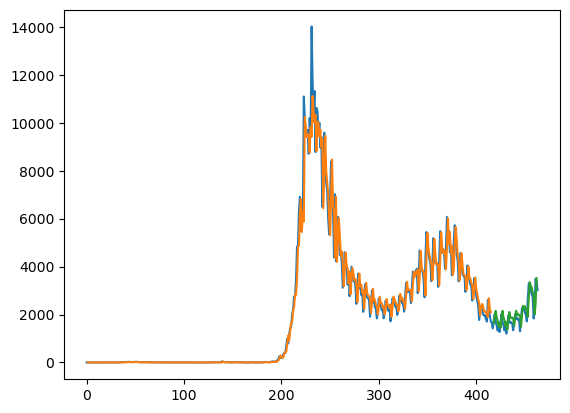

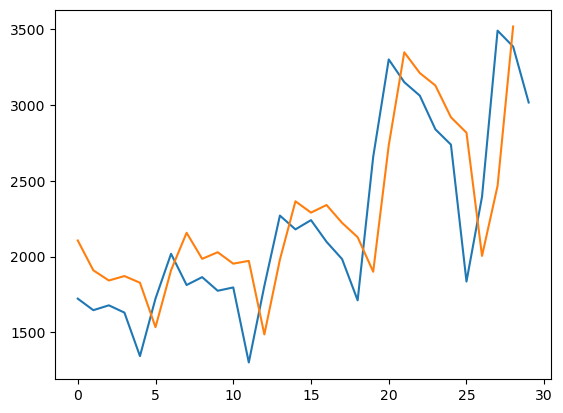

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taoyuan_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taoyuan_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('taoyuan_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taoyuan_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 52/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0258 - mse: 0.0258 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 53/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 54/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0222 - mse: 0.0222 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 55/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 7.6600e-04 - val_mse: 7.6600e-04
Epoch 56/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 7.7561e-04 - val_mse: 7.7561e-04
Epoch 57/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 6.6574e-04 - val_mse: 6.6574e-04
Epoch 58/5000
415/415 [========

Epoch 109/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 110/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 7.4189e-04 - val_mse: 7.4189e-04
Epoch 111/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 7.2949e-04 - val_mse: 7.2949e-04
Epoch 112/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 7.7222e-04 - val_mse: 7.7222e-04
Epoch 113/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 114/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.5299e-04 - val_mse: 8.5299e-04
Epoch 115/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.1855e-04 - val_mse: 7.1855e-04
Epoch 11

415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 7.2637e-04 - val_mse: 7.2637e-04
Epoch 167/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.8397e-04 - val_mse: 7.8397e-04
Epoch 168/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 6.9085e-04 - val_mse: 6.9085e-04
Epoch 169/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.8823e-04 - val_mse: 6.8823e-04
Epoch 170/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 7.4971e-04 - val_mse: 7.4971e-04
Epoch 171/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.0389e-04 - val_mse: 7.0389e-04
Epoch 172/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.7275e-04 - val_mse: 8.7275e-04
Epoch 1

415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.7947e-04 - val_mse: 6.7947e-04
Epoch 224/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 225/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.9091e-04 - val_mse: 6.9091e-04
Epoch 226/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 227/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.9401e-04 - val_mse: 6.9401e-04
Epoch 228/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.7448e-04 - val_mse: 7.7448e-04
Epoch 229/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.5668e-04 - val_mse: 7.5668e-04
Epoch 230/5000
415/415 

415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.4006e-04 - val_mse: 7.4006e-04
Epoch 281/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.7210e-04 - val_mse: 8.7210e-04
Epoch 282/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.7774e-04 - val_mse: 6.7774e-04
Epoch 283/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 284/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7518e-04 - val_mse: 6.7518e-04
Epoch 285/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.3433e-04 - val_mse: 7.3433e-04
Epoch 286/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.1142e-04 - val_mse: 7.1142e-04
Epoch 287/5000


415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 338/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.6961e-04 - val_mse: 6.6961e-04
Epoch 339/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 9.9010e-04 - val_mse: 9.9010e-04
Epoch 340/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.9260e-04 - val_mse: 8.9260e-04
Epoch 341/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.3558e-04 - val_mse: 8.3558e-04
Epoch 342/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 343/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.9090e-04 - val_mse: 6.9090e-04
Epoch 344/5000
415/415 

415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7151e-04 - val_mse: 6.7151e-04
Epoch 395/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 396/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6553e-04 - val_mse: 6.6553e-04
Epoch 397/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 398/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 399/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.5110e-04 - val_mse: 8.5110e-04
Epoch 400/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.8052e-04 - val_mse: 6.8052e-04
Epoch 401/5000
415/415 [=======

415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.6186e-04 - val_mse: 8.6186e-04
Epoch 452/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 453/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.6653e-04 - val_mse: 7.6653e-04
Epoch 454/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.6679e-04 - val_mse: 6.6679e-04
Epoch 455/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.8559e-04 - val_mse: 7.8559e-04
Epoch 456/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 9.0381e-04 - val_mse: 9.0381e-04
Epoch 457/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.9169e-04 - val_mse: 6.9169e-04
Epoch 458/5000


415/415 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 509/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.3089e-04 - val_mse: 8.3089e-04
Epoch 510/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.0965e-04 - val_mse: 7.0965e-04
Epoch 511/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.6497e-04 - val_mse: 8.6497e-04
Epoch 512/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6432e-04 - val_mse: 6.6432e-04
Epoch 513/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.5737e-04 - val_mse: 8.5737e-04
Epoch 514/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7422e-04 - val_mse: 6.7422e-04
Epoch 515/5000


415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.1919e-04 - val_mse: 7.1919e-04
Epoch 566/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.6350e-04 - val_mse: 6.6350e-04
Epoch 567/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.2029e-04 - val_mse: 8.2029e-04
Epoch 568/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 569/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.8824e-04 - val_mse: 6.8824e-04
Epoch 570/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.5540e-04 - val_mse: 8.5540e-04
Epoch 571/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 572/5000
415/415 

415/415 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.4655e-04 - val_mse: 9.4655e-04
Epoch 623/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.1130e-04 - val_mse: 7.1130e-04
Epoch 624/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.0548e-04 - val_mse: 7.0548e-04
Epoch 625/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 8.7707e-04 - val_mse: 8.7707e-04
Epoch 626/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.1718e-04 - val_mse: 7.1718e-04
Epoch 627/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.3737e-04 - val_mse: 8.3737e-04
Epoch 628/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.8441e-04 - val_mse: 6.8441e-04
Epoch 6

415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 680/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.7759e-04 - val_mse: 6.7759e-04
Epoch 681/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.4749e-04 - val_mse: 7.4749e-04
Epoch 682/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.9777e-04 - val_mse: 6.9777e-04
Epoch 683/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.8157e-04 - val_mse: 7.8157e-04
Epoch 684/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 685/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.8509e-04 - val_mse: 6.8509e-04
Epoch 686/5000
415/415 

415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.3382e-04 - val_mse: 8.3382e-04
Epoch 737/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.9711e-04 - val_mse: 6.9711e-04
Epoch 738/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.6189e-04 - val_mse: 6.6189e-04
Epoch 739/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 9.9037e-04 - val_mse: 9.9037e-04
Epoch 740/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.6114e-04 - val_mse: 6.6114e-04
Epoch 741/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.9994e-04 - val_mse: 6.9994e-04
Epoch 742/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6151e-04 - val_mse: 6.6151e-04
Epoch 7

415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.0474e-04 - val_mse: 8.0474e-04
Epoch 794/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 795/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6558e-04 - val_mse: 6.6558e-04
Epoch 796/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 797/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 7.5523e-04 - val_mse: 7.5523e-04
Epoch 798/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.1377e-04 - val_mse: 8.1377e-04
Epoch 799/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.2180e-04 - val_mse: 7.2180e-04
Epoch 800/5000
415/415 

415/415 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 8.6123e-04 - val_mse: 8.6123e-04
Epoch 851/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.2654e-04 - val_mse: 8.2654e-04
Epoch 852/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 853/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 854/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.2542e-04 - val_mse: 9.2542e-04
Epoch 855/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 7.4765e-04 - val_mse: 7.4765e-04
Epoch 856/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.3398e-04 - val_mse: 8.3398e-04
Epoch 857/5000
415/415 

Epoch 908/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.7382e-04 - val_mse: 6.7382e-04
Epoch 909/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.7357e-04 - val_mse: 7.7357e-04
Epoch 910/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.7385e-04 - val_mse: 6.7385e-04
Epoch 911/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.0851e-04 - val_mse: 7.0851e-04
Epoch 912/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.6758e-04 - val_mse: 6.6758e-04
Epoch 913/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 7.4136e-04 - val_mse: 7.4136e-04
Epoch 914/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0012 - val_mse: 0.0012


415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 8.2687e-04 - val_mse: 8.2687e-04
Epoch 966/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 9.7233e-04 - val_mse: 9.7233e-04
Epoch 967/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.9203e-04 - val_mse: 8.9203e-04
Epoch 968/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 6.6202e-04 - val_mse: 6.6202e-04
Epoch 969/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.3597e-04 - val_mse: 7.3597e-04
Epoch 970/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.4161e-04 - val_mse: 7.4161e-04
Epoch 971/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6631e-04 - val_mse: 6.6631e-04
Epoch 9

415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.9603e-04 - val_mse: 7.9603e-04
Epoch 1023/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.0966e-04 - val_mse: 7.0966e-04
Epoch 1024/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1025/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.6813e-04 - val_mse: 6.6813e-04
Epoch 1026/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.1241e-04 - val_mse: 7.1241e-04
Epoch 1027/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 9.8510e-04 - val_mse: 9.8510e-04
Epoch 1028/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.0732e-04 - val_mse: 8.0732e-04
Epoch 102

415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.2377e-04 - val_mse: 7.2377e-04
Epoch 1080/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.9259e-04 - val_mse: 7.9259e-04
Epoch 1081/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 9.2868e-04 - val_mse: 9.2868e-04
Epoch 1082/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.5846e-04 - val_mse: 6.5846e-04
Epoch 1083/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.9867e-04 - val_mse: 9.9867e-04
Epoch 1084/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.7470e-04 - val_mse: 8.7470e-04
Epoch 1085/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.8890e-04 - val_mse: 9.8890e-04
E

415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1137/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1138/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.6253e-04 - val_mse: 6.6253e-04
Epoch 1139/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.2548e-04 - val_mse: 7.2548e-04
Epoch 1140/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6439e-04 - val_mse: 6.6439e-04
Epoch 1141/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.3783e-04 - val_mse: 7.3783e-04
Epoch 1142/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1143/5000
415/415 [

415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.2169e-04 - val_mse: 7.2169e-04
Epoch 1194/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.7144e-04 - val_mse: 6.7144e-04
Epoch 1195/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.2646e-04 - val_mse: 7.2646e-04
Epoch 1196/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.9316e-04 - val_mse: 6.9316e-04
Epoch 1197/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6907e-04 - val_mse: 6.6907e-04
Epoch 1198/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.2265e-04 - val_mse: 7.2265e-04
Epoch 1199/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.8711e-04 - val_mse: 6.8711e-04
E

415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.0823e-04 - val_mse: 7.0823e-04
Epoch 1251/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.7115e-04 - val_mse: 6.7115e-04
Epoch 1252/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.6710e-04 - val_mse: 6.6710e-04
Epoch 1253/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.7480e-04 - val_mse: 6.7480e-04
Epoch 1254/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.7008e-04 - val_mse: 6.7008e-04
Epoch 1255/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.9245e-04 - val_mse: 6.9245e-04
Epoch 1256/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.3870e-04 - val_mse: 8.3870e-04
E

415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.5222e-04 - val_mse: 8.5222e-04
Epoch 1308/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.6613e-04 - val_mse: 6.6613e-04
Epoch 1309/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6110e-04 - val_mse: 6.6110e-04
Epoch 1310/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1311/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.1108e-04 - val_mse: 7.1108e-04
Epoch 1312/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.2600e-04 - val_mse: 7.2600e-04
Epoch 1313/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.0672e-04 - val_mse: 7.0672e-04
Epoch 131

Epoch 1364/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.6075e-04 - val_mse: 6.6075e-04
Epoch 1365/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8489e-04 - val_mse: 6.8489e-04
Epoch 1366/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 9.5886e-04 - val_mse: 9.5886e-04
Epoch 1367/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1368/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.7892e-04 - val_mse: 6.7892e-04
Epoch 1369/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.7598e-04 - val_mse: 6.7598e-04
Epoch 1370/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.6984e-04 - val_mse: 6.69

Epoch 1421/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.9346e-04 - val_mse: 7.9346e-04
Epoch 1422/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.5739e-04 - val_mse: 6.5739e-04
Epoch 1423/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.4482e-04 - val_mse: 7.4482e-04
Epoch 1424/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.1895e-04 - val_mse: 7.1895e-04
Epoch 1425/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.9960e-04 - val_mse: 6.9960e-04
Epoch 1426/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1427/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.9234e-04 - val_mse: 8.92

Epoch 1478/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.7692e-04 - val_mse: 6.7692e-04
Epoch 1479/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.9589e-04 - val_mse: 7.9589e-04
Epoch 1480/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.7523e-04 - val_mse: 6.7523e-04
Epoch 1481/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.4000e-04 - val_mse: 8.4000e-04
Epoch 1482/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 9.2447e-04 - val_mse: 9.2447e-04
Epoch 1483/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 7.7713e-04 - val_mse: 7.7713e-04
Epoch 1484/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.5945e-04 - val_m

Epoch 1535/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 7.6401e-04 - val_mse: 7.6401e-04
Epoch 1536/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6577e-04 - val_mse: 6.6577e-04
Epoch 1537/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 7.0472e-04 - val_mse: 7.0472e-04
Epoch 1538/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1539/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.7575e-04 - val_mse: 6.7575e-04
Epoch 1540/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.2600e-04 - val_mse: 8.2600e-04
Epoch 1541/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.7945e-04 - val_mse: 6.79

Epoch 1592/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6123e-04 - val_mse: 6.6123e-04
Epoch 1593/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.6186e-04 - val_mse: 8.6186e-04
Epoch 1594/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.1124e-04 - val_mse: 7.1124e-04
Epoch 1595/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.5936e-04 - val_mse: 6.5936e-04
Epoch 1596/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.7137e-04 - val_mse: 8.7137e-04
Epoch 1597/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.8366e-04 - val_mse: 7.8366e-04
Epoch 1598/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.7917e-04 - val_m

Epoch 1649/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1650/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.6968e-04 - val_mse: 8.6968e-04
Epoch 1651/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.2035e-04 - val_mse: 7.2035e-04
Epoch 1652/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.8449e-04 - val_mse: 6.8449e-04
Epoch 1653/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1654/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6102e-04 - val_mse: 6.6102e-04
Epoch 1655/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 7.2549e-04 - val_mse: 7.2549e-04
E

Epoch 1706/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.7806e-04 - val_mse: 7.7806e-04
Epoch 1707/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.8557e-04 - val_mse: 7.8557e-04
Epoch 1708/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 1709/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 7.0906e-04 - val_mse: 7.0906e-04
Epoch 1710/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.7668e-04 - val_mse: 6.7668e-04
Epoch 1711/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.6215e-04 - val_mse: 6.6215e-04
Epoch 1712/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0012 - val_mse: 0.0012
E

415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 8.5755e-04 - val_mse: 8.5755e-04
Epoch 1764/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.6366e-04 - val_mse: 6.6366e-04
Epoch 1765/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 9.4365e-04 - val_mse: 9.4365e-04
Epoch 1766/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.7399e-04 - val_mse: 6.7399e-04
Epoch 1767/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.5749e-04 - val_mse: 6.5749e-04
Epoch 1768/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 7.2428e-04 - val_mse: 7.2428e-04
Epoch 1769/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.5880e-04 - val_mse: 6.5880e-04
E

Epoch 1820/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 8.2266e-04 - val_mse: 8.2266e-04
Epoch 1821/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 1822/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.3678e-04 - val_mse: 7.3678e-04
Epoch 1823/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.3721e-04 - val_mse: 7.3721e-04
Epoch 1824/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.3306e-04 - val_mse: 7.3306e-04
Epoch 1825/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.7791e-04 - val_mse: 6.7791e-04
Epoch 1826/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 6.6112e-04 - val_mse: 6.61

Epoch 1877/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1878/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.7268e-04 - val_mse: 6.7268e-04
Epoch 1879/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1880/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1032e-04 - val_mse: 7.1032e-04
Epoch 1881/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.8866e-04 - val_mse: 8.8866e-04
Epoch 1882/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.6593e-04 - val_mse: 8.6593e-04
Epoch 1883/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.7209e-04 - val_mse: 6.7209e-04
E

Epoch 1934/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 9.9183e-04 - val_mse: 9.9183e-04
Epoch 1935/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.7544e-04 - val_mse: 7.7544e-04
Epoch 1936/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.8907e-04 - val_mse: 7.8907e-04
Epoch 1937/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.0255e-04 - val_mse: 7.0255e-04
Epoch 1938/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.1053e-04 - val_mse: 7.1053e-04
Epoch 1939/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 6.8296e-04 - val_mse: 6.8296e-04
Epoch 1940/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 7.7277e-04 - val_m

Epoch 1991/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.1634e-04 - val_mse: 7.1634e-04
Epoch 1992/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.4471e-04 - val_mse: 7.4471e-04
Epoch 1993/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.6842e-04 - val_mse: 6.6842e-04
Epoch 1994/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.2972e-04 - val_mse: 8.2972e-04
Epoch 1995/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 7.0864e-04 - val_mse: 7.0864e-04
Epoch 1996/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.6227e-04 - val_mse: 6.6227e-04
Epoch 1997/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7194e-04 - val_m

415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 8.9820e-04 - val_mse: 8.9820e-04
Epoch 2048/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2049/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.6244e-04 - val_mse: 6.6244e-04
Epoch 2050/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.6028e-04 - val_mse: 6.6028e-04
Epoch 2051/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.6867e-04 - val_mse: 7.6867e-04
Epoch 2052/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.7817e-04 - val_mse: 6.7817e-04
Epoch 2053/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.1236e-04 - val_mse: 8.1236e-04
Epoch 205

Epoch 2104/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.3623e-04 - val_mse: 7.3623e-04
Epoch 2105/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.1662e-04 - val_mse: 9.1662e-04
Epoch 2106/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2107/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.7411e-04 - val_mse: 6.7411e-04
Epoch 2108/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 6.8639e-04 - val_mse: 6.8639e-04
Epoch 2109/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.0266e-04 - val_mse: 7.0266e-04
Epoch 2110/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0011 - val_mse: 0.0011
E

Epoch 2161/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.0948e-04 - val_mse: 7.0948e-04
Epoch 2162/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 7.3387e-04 - val_mse: 7.3387e-04
Epoch 2163/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 8.7682e-04 - val_mse: 8.7682e-04
Epoch 2164/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.8578e-04 - val_mse: 6.8578e-04
Epoch 2165/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.1059e-04 - val_mse: 7.1059e-04
Epoch 2166/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.9422e-04 - val_mse: 6.9422e-04
Epoch 2167/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.4278e-04 - val_m

Epoch 2218/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.0686e-04 - val_mse: 7.0686e-04
Epoch 2219/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.7747e-04 - val_mse: 6.7747e-04
Epoch 2220/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6070e-04 - val_mse: 6.6070e-04
Epoch 2221/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6580e-04 - val_mse: 6.6580e-04
Epoch 2222/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 7.3896e-04 - val_mse: 7.3896e-04
Epoch 2223/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 7.1947e-04 - val_mse: 7.1947e-04
Epoch 2224/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 8.1686e-04 - val_m

415/415 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 9.1939e-04 - val_mse: 9.1939e-04
Epoch 2275/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.3611e-04 - val_mse: 8.3611e-04
Epoch 2276/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.2283e-04 - val_mse: 7.2283e-04
Epoch 2277/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2278/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6268e-04 - val_mse: 6.6268e-04
Epoch 2279/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.1903e-04 - val_mse: 8.1903e-04
Epoch 2280/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.7279e-04 - val_mse: 6.7279e-04
Epoch 228

Epoch 2331/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.8165e-04 - val_mse: 8.8165e-04
Epoch 2332/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.3217e-04 - val_mse: 8.3217e-04
Epoch 2333/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.2686e-04 - val_mse: 7.2686e-04
Epoch 2334/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6866e-04 - val_mse: 6.6866e-04
Epoch 2335/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.2189e-04 - val_mse: 7.2189e-04
Epoch 2336/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2337/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.6895e-04 - val_mse: 6.68

415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2388/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.6137e-04 - val_mse: 6.6137e-04
Epoch 2389/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.7122e-04 - val_mse: 6.7122e-04
Epoch 2390/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.6951e-04 - val_mse: 8.6951e-04
Epoch 2391/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 6.9800e-04 - val_mse: 6.9800e-04
Epoch 2392/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 6.6381e-04 - val_mse: 6.6381e-04
Epoch 2393/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 6.6492e-04 - val_mse: 6.6492e-04
Epoch 239

Epoch 2444/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 9.4102e-04 - val_mse: 9.4102e-04
Epoch 2445/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.7615e-04 - val_mse: 6.7615e-04
Epoch 2446/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8666e-04 - val_mse: 6.8666e-04
Epoch 2447/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.6378e-04 - val_mse: 6.6378e-04
Epoch 2448/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.8571e-04 - val_mse: 7.8571e-04
Epoch 2449/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.9274e-04 - val_mse: 6.9274e-04
Epoch 2450/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 6.6224e-04 - val_m

Epoch 2502/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.0694e-04 - val_mse: 7.0694e-04
Epoch 2503/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.3845e-04 - val_mse: 8.3845e-04
Epoch 2504/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.9817e-04 - val_mse: 8.9817e-04
Epoch 2505/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.1527e-04 - val_mse: 8.1527e-04
Epoch 2506/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.9740e-04 - val_mse: 7.9740e-04
Epoch 2507/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.8381e-04 - val_mse: 6.8381e-04
Epoch 2508/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.6339e-04 - val_m

Epoch 2559/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.7567e-04 - val_mse: 6.7567e-04
Epoch 2560/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2561/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7505e-04 - val_mse: 6.7505e-04
Epoch 2562/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.8158e-04 - val_mse: 6.8158e-04
Epoch 2563/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 7.2904e-04 - val_mse: 7.2904e-04
Epoch 2564/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6601e-04 - val_mse: 6.6601e-04
Epoch 2565/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7280e-04 - val_mse: 6.72

415/415 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.8929e-04 - val_mse: 6.8929e-04
Epoch 2616/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.7612e-04 - val_mse: 6.7612e-04
Epoch 2617/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 9.7069e-04 - val_mse: 9.7069e-04
Epoch 2618/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2619/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 6.6826e-04 - val_mse: 6.6826e-04
Epoch 2620/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 7.8220e-04 - val_mse: 7.8220e-04
Epoch 2621/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.5930e-04 - val_mse: 6.5930e-04
Epoch 262

Epoch 2672/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.7409e-04 - val_mse: 6.7409e-04
Epoch 2673/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6085e-04 - val_mse: 6.6085e-04
Epoch 2674/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2675/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.7981e-04 - val_mse: 6.7981e-04
Epoch 2676/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.8124e-04 - val_mse: 8.8124e-04
Epoch 2677/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.9792e-04 - val_mse: 6.9792e-04
Epoch 2678/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.6125e-04 - val_mse: 6.61

Epoch 2729/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 7.3641e-04 - val_mse: 7.3641e-04
Epoch 2730/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.9224e-04 - val_mse: 7.9224e-04
Epoch 2731/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.7183e-04 - val_mse: 6.7183e-04
Epoch 2732/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.9178e-04 - val_mse: 6.9178e-04
Epoch 2733/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.6326e-04 - val_mse: 6.6326e-04
Epoch 2734/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2735/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.5997e-04 - val_mse: 6.59

Epoch 2786/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7033e-04 - val_mse: 6.7033e-04
Epoch 2787/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 6.8448e-04 - val_mse: 6.8448e-04
Epoch 2788/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 8.3319e-04 - val_mse: 8.3319e-04
Epoch 2789/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.5342e-04 - val_mse: 7.5342e-04
Epoch 2790/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.8750e-04 - val_mse: 6.8750e-04
Epoch 2791/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.3974e-04 - val_mse: 8.3974e-04
Epoch 2792/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.0204e-04 - val_m

415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.9364e-04 - val_mse: 6.9364e-04
Epoch 2843/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.8933e-04 - val_mse: 6.8933e-04
Epoch 2844/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 7.6206e-04 - val_mse: 7.6206e-04
Epoch 2845/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.5920e-04 - val_mse: 6.5920e-04
Epoch 2846/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.6436e-04 - val_mse: 6.6436e-04
Epoch 2847/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.2637e-04 - val_mse: 8.2637e-04
Epoch 2848/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 7.5790e-04 - val_mse: 7.5790e-04
E

Epoch 2899/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 7.3918e-04 - val_mse: 7.3918e-04
Epoch 2900/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 7.2053e-04 - val_mse: 7.2053e-04
Epoch 2901/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6450e-04 - val_mse: 6.6450e-04
Epoch 2902/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.2598e-04 - val_mse: 7.2598e-04
Epoch 2903/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 7.2860e-04 - val_mse: 7.2860e-04
Epoch 2904/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2905/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.7646e-04 - val_mse: 6.76

Epoch 2956/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 8.3140e-04 - val_mse: 8.3140e-04
Epoch 2957/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6028e-04 - val_mse: 6.6028e-04
Epoch 2958/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2959/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.6669e-04 - val_mse: 7.6669e-04
Epoch 2960/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.8961e-04 - val_mse: 6.8961e-04
Epoch 2961/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.4235e-04 - val_mse: 9.4235e-04
Epoch 2962/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.7223e-04 - val_mse: 8.72

415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.6440e-04 - val_mse: 6.6440e-04
Epoch 3013/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3014/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3015/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 9.5466e-04 - val_mse: 9.5466e-04
Epoch 3016/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.6227e-04 - val_mse: 6.6227e-04
Epoch 3017/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.5524e-04 - val_mse: 8.5524e-04
Epoch 3018/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.6474e-04 - val_mse: 8.6474e-04
Epoch 3019/5000
4

Epoch 3069/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.7392e-04 - val_mse: 6.7392e-04
Epoch 3070/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.7120e-04 - val_mse: 6.7120e-04
Epoch 3071/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.7333e-04 - val_mse: 6.7333e-04
Epoch 3072/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.5470e-04 - val_mse: 7.5470e-04
Epoch 3073/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.9909e-04 - val_mse: 6.9909e-04
Epoch 3074/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.2491e-04 - val_mse: 7.2491e-04
Epoch 3075/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.2056e-04 - val_m

Epoch 3126/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3127/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8192e-04 - val_mse: 9.8192e-04
Epoch 3128/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 6.8223e-04 - val_mse: 6.8223e-04
Epoch 3129/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.9440e-04 - val_mse: 6.9440e-04
Epoch 3130/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 6.7445e-04 - val_mse: 6.7445e-04
Epoch 3131/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.5881e-04 - val_mse: 6.5881e-04
Epoch 3132/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.8159e-04 - val_mse: 6.81

415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.7651e-04 - val_mse: 6.7651e-04
Epoch 3183/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.6764e-04 - val_mse: 6.6764e-04
Epoch 3184/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 6.8160e-04 - val_mse: 6.8160e-04
Epoch 3185/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.9390e-04 - val_mse: 6.9390e-04
Epoch 3186/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 7.4677e-04 - val_mse: 7.4677e-04
Epoch 3187/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 6.9338e-04 - val_mse: 6.9338e-04
Epoch 3188/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.7690e-04 - val_mse: 6.7690e-04
E

Epoch 3239/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.8009e-04 - val_mse: 8.8009e-04
Epoch 3240/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.9280e-04 - val_mse: 6.9280e-04
Epoch 3241/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.5406e-04 - val_mse: 7.5406e-04
Epoch 3242/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 7.9156e-04 - val_mse: 7.9156e-04
Epoch 3243/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6711e-04 - val_mse: 6.6711e-04
Epoch 3244/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 6.6961e-04 - val_mse: 6.6961e-04
Epoch 3245/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.6127e-04 - val_m

Epoch 3296/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 8.8969e-04 - val_mse: 8.8969e-04
Epoch 3297/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.6383e-04 - val_mse: 6.6383e-04
Epoch 3298/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.7751e-04 - val_mse: 6.7751e-04
Epoch 3299/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.8484e-04 - val_mse: 8.8484e-04
Epoch 3300/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.9259e-04 - val_mse: 6.9259e-04
Epoch 3301/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.7958e-04 - val_mse: 6.7958e-04
Epoch 3302/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 6.6214e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 7.6701e-04 - val_mse: 7.6701e-04
Epoch 3353/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.7822e-04 - val_mse: 7.7822e-04
Epoch 3354/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 8.3769e-04 - val_mse: 8.3769e-04
Epoch 3355/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.0453e-04 - val_mse: 8.0453e-04
Epoch 3356/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.6622e-04 - val_mse: 6.6622e-04
Epoch 3357/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 7.1429e-04 - val_mse: 7.1429e-04
Epoch 3358/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.2560e-04 - val_mse: 7.2560e-04
E

Epoch 3418/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.4938e-04 - val_mse: 9.4938e-04
Epoch 3419/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.0713e-04 - val_mse: 7.0713e-04
Epoch 3420/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.5599e-04 - val_mse: 9.5599e-04
Epoch 3421/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 9.5704e-04 - val_mse: 9.5704e-04
Epoch 3422/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.8801e-04 - val_mse: 6.8801e-04
Epoch 3423/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.9469e-04 - val_mse: 6.9469e-04
Epoch 3424/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1789e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.1349e-04 - val_mse: 7.1349e-04
Epoch 3475/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 9.7069e-04 - val_mse: 9.7069e-04
Epoch 3476/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 9.3019e-04 - val_mse: 9.3019e-04
Epoch 3477/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6574e-04 - val_mse: 6.6574e-04
Epoch 3478/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.6218e-04 - val_mse: 6.6218e-04
Epoch 3479/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 7.6684e-04 - val_mse: 7.6684e-04
Epoch 3480/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 8.4682e-04 - val_mse: 8.4682e-04
E

Epoch 3531/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.7492e-04 - val_mse: 8.7492e-04
Epoch 3532/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.6275e-04 - val_mse: 6.6275e-04
Epoch 3533/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.6059e-04 - val_mse: 9.6059e-04
Epoch 3534/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 9.0721e-04 - val_mse: 9.0721e-04
Epoch 3535/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.8048e-04 - val_mse: 6.8048e-04
Epoch 3536/5000
415/415 [==============================] - 4s 9ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3537/5000
415/415 [==============================] - 3s 8ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 7.3079e-04 - val_mse: 7.30

415/415 [==============================] - 3s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.8228e-04 - val_mse: 7.8228e-04
Epoch 3588/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 9.6002e-04 - val_mse: 9.6002e-04
Epoch 3589/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3590/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 7.3354e-04 - val_mse: 7.3354e-04
Epoch 3591/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.7033e-04 - val_mse: 6.7033e-04
Epoch 3592/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.6493e-04 - val_mse: 6.6493e-04
Epoch 3593/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.3761e-04 - val_mse: 7.3761e-04
Epoch 359

Epoch 3644/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.6319e-04 - val_mse: 6.6319e-04
Epoch 3645/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.6215e-04 - val_mse: 6.6215e-04
Epoch 3646/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.6643e-04 - val_mse: 8.6643e-04
Epoch 3647/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.6124e-04 - val_mse: 6.6124e-04
Epoch 3648/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.0686e-04 - val_mse: 7.0686e-04
Epoch 3649/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 6.6565e-04 - val_mse: 6.6565e-04
Epoch 3650/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.5965e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 8.8780e-04 - val_mse: 8.8780e-04
Epoch 3701/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.9980e-04 - val_mse: 7.9980e-04
Epoch 3702/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.2457e-04 - val_mse: 7.2457e-04
Epoch 3703/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5863e-04 - val_mse: 6.5863e-04
Epoch 3704/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 7.8999e-04 - val_mse: 7.8999e-04
Epoch 3705/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 7.4537e-04 - val_mse: 7.4537e-04
Epoch 3706/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6404e-04 - val_mse: 6.6404e-04
E

Epoch 3757/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.5968e-04 - val_mse: 6.5968e-04
Epoch 3758/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5990e-04 - val_mse: 6.5990e-04
Epoch 3759/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3760/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.7459e-04 - val_mse: 6.7459e-04
Epoch 3761/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 6.8252e-04 - val_mse: 6.8252e-04
Epoch 3762/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5926e-04 - val_mse: 6.5926e-04
Epoch 3763/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.7857e-04 - val_mse: 6.78

Epoch 3814/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.7163e-04 - val_mse: 6.7163e-04
Epoch 3815/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.8612e-04 - val_mse: 6.8612e-04
Epoch 3816/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.7301e-04 - val_mse: 6.7301e-04
Epoch 3817/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.9028e-04 - val_mse: 6.9028e-04
Epoch 3818/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.8165e-04 - val_mse: 6.8165e-04
Epoch 3819/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.8684e-04 - val_mse: 9.8684e-04
Epoch 3820/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.6214e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 8.7901e-04 - val_mse: 8.7901e-04
Epoch 3871/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 7.0224e-04 - val_mse: 7.0224e-04
Epoch 3872/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.5711e-04 - val_mse: 7.5711e-04
Epoch 3873/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.7714e-04 - val_mse: 6.7714e-04
Epoch 3874/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.7423e-04 - val_mse: 6.7423e-04
Epoch 3875/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3876/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 8.4258e-04 - val_mse: 8.4258e-04
Epoch 387

Epoch 3927/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 6.6120e-04 - val_mse: 6.6120e-04
Epoch 3928/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.7388e-04 - val_mse: 6.7388e-04
Epoch 3929/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 7.0742e-04 - val_mse: 7.0742e-04
Epoch 3930/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 8.0063e-04 - val_mse: 8.0063e-04
Epoch 3931/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 9.2523e-04 - val_mse: 9.2523e-04
Epoch 3932/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.7855e-04 - val_mse: 6.7855e-04
Epoch 3933/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.5893e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5960e-04 - val_mse: 6.5960e-04
Epoch 3984/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.5836e-04 - val_mse: 6.5836e-04
Epoch 3985/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.7532e-04 - val_mse: 6.7532e-04
Epoch 3986/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.5854e-04 - val_mse: 6.5854e-04
Epoch 3987/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.6549e-04 - val_mse: 6.6549e-04
Epoch 3988/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 6.9294e-04 - val_mse: 6.9294e-04
Epoch 3989/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 6.6262e-04 - val_mse: 6.6262e-04
E

Epoch 4040/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.0614e-04 - val_mse: 7.0614e-04
Epoch 4041/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 6.6248e-04 - val_mse: 6.6248e-04
Epoch 4042/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6150e-04 - val_mse: 6.6150e-04
Epoch 4043/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 8.3743e-04 - val_mse: 8.3743e-04
Epoch 4044/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 8.3476e-04 - val_mse: 8.3476e-04
Epoch 4045/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.7177e-04 - val_mse: 7.7177e-04
Epoch 4046/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.8091e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 6.6635e-04 - val_mse: 6.6635e-04
Epoch 4097/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.9779e-04 - val_mse: 6.9779e-04
Epoch 4098/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.2836e-04 - val_mse: 8.2836e-04
Epoch 4099/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 8.0809e-04 - val_mse: 8.0809e-04
Epoch 4100/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 8.1474e-04 - val_mse: 8.1474e-04
Epoch 4101/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 6.6070e-04 - val_mse: 6.6070e-04
Epoch 4102/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 6.9316e-04 - val_mse: 6.9316e-04
E

415/415 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.6207e-04 - val_mse: 7.6207e-04
Epoch 4153/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 7.9054e-04 - val_mse: 7.9054e-04
Epoch 4154/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.6686e-04 - val_mse: 6.6686e-04
Epoch 4155/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.4656e-04 - val_mse: 7.4656e-04
Epoch 4156/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.6119e-04 - val_mse: 6.6119e-04
Epoch 4157/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4158/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.3328e-04 - val_mse: 7.3328e-04
Epoch 415

Epoch 4209/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 9.0711e-04 - val_mse: 9.0711e-04
Epoch 4210/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.9826e-04 - val_mse: 6.9826e-04
Epoch 4211/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 6.6693e-04 - val_mse: 6.6693e-04
Epoch 4212/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6597e-04 - val_mse: 6.6597e-04
Epoch 4213/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 6.6003e-04 - val_mse: 6.6003e-04
Epoch 4214/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.7591e-04 - val_mse: 7.7591e-04
Epoch 4215/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 9.0836e-04 - val_m

415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7012e-04 - val_mse: 6.7012e-04
Epoch 4266/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.7889e-04 - val_mse: 7.7889e-04
Epoch 4267/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 7.3544e-04 - val_mse: 7.3544e-04
Epoch 4268/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 7.3992e-04 - val_mse: 7.3992e-04
Epoch 4269/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.7041e-04 - val_mse: 8.7041e-04
Epoch 4270/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.9258e-04 - val_mse: 7.9258e-04
Epoch 4271/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 7.6002e-04 - val_mse: 7.6002e-04
E

Epoch 4322/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 7.1355e-04 - val_mse: 7.1355e-04
Epoch 4323/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.8368e-04 - val_mse: 6.8368e-04
Epoch 4324/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.2066e-04 - val_mse: 8.2066e-04
Epoch 4325/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.9711e-04 - val_mse: 6.9711e-04
Epoch 4326/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.2841e-04 - val_mse: 7.2841e-04
Epoch 4327/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.7085e-04 - val_mse: 7.7085e-04
Epoch 4328/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 6.6383e-04 - val_m

415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.4813e-04 - val_mse: 7.4813e-04
Epoch 4379/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 8.7066e-04 - val_mse: 8.7066e-04
Epoch 4380/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 6.6230e-04 - val_mse: 6.6230e-04
Epoch 4381/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 6.5708e-04 - val_mse: 6.5708e-04
Epoch 4382/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 7.9816e-04 - val_mse: 7.9816e-04
Epoch 4383/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.6574e-04 - val_mse: 6.6574e-04
Epoch 4384/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 7.1786e-04 - val_mse: 7.1786e-04
E

Epoch 4435/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.6148e-04 - val_mse: 6.6148e-04
Epoch 4436/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 6.9371e-04 - val_mse: 6.9371e-04
Epoch 4437/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.7803e-04 - val_mse: 7.7803e-04
Epoch 4438/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4439/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 7.4636e-04 - val_mse: 7.4636e-04
Epoch 4440/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 7.0672e-04 - val_mse: 7.0672e-04
Epoch 4441/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 7.0035e-04 - val_mse: 7.00

415/415 [==============================] - 3s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 6.9987e-04 - val_mse: 6.9987e-04
Epoch 4492/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6229e-04 - val_mse: 6.6229e-04
Epoch 4493/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.3518e-04 - val_mse: 8.3518e-04
Epoch 4494/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 6.7122e-04 - val_mse: 6.7122e-04
Epoch 4495/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 7.7596e-04 - val_mse: 7.7596e-04
Epoch 4496/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 8.7227e-04 - val_mse: 8.7227e-04
Epoch 4497/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.3191e-04 - val_mse: 7.3191e-04
E

Epoch 4548/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6432e-04 - val_mse: 6.6432e-04
Epoch 4549/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 7.0887e-04 - val_mse: 7.0887e-04
Epoch 4550/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.6021e-04 - val_mse: 6.6021e-04
Epoch 4551/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 6.5956e-04 - val_mse: 6.5956e-04
Epoch 4552/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.5915e-04 - val_mse: 6.5915e-04
Epoch 4553/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.5012e-04 - val_mse: 7.5012e-04
Epoch 4554/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 6.6995e-04 - val_m

415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 9.4392e-04 - val_mse: 9.4392e-04
Epoch 4605/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.9455e-04 - val_mse: 6.9455e-04
Epoch 4606/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 7.1786e-04 - val_mse: 7.1786e-04
Epoch 4607/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 8.1420e-04 - val_mse: 8.1420e-04
Epoch 4608/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 6.6739e-04 - val_mse: 6.6739e-04
Epoch 4609/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 8.2036e-04 - val_mse: 8.2036e-04
Epoch 4610/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 6.6291e-04 - val_mse: 6.6291e-04
E

415/415 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.9446e-04 - val_mse: 6.9446e-04
Epoch 4661/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 8.7502e-04 - val_mse: 8.7502e-04
Epoch 4662/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.7058e-04 - val_mse: 8.7058e-04
Epoch 4663/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.3288e-04 - val_mse: 7.3288e-04
Epoch 4664/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.8296e-04 - val_mse: 6.8296e-04
Epoch 4665/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 7.2074e-04 - val_mse: 7.2074e-04
Epoch 4666/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 7.1028e-04 - val_mse: 7.1028e-04
E

Epoch 4717/5000
415/415 [==============================] - 3s 7ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.5592e-04 - val_mse: 8.5592e-04
Epoch 4718/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 7.3625e-04 - val_mse: 7.3625e-04
Epoch 4719/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 6.9693e-04 - val_mse: 6.9693e-04
Epoch 4720/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 7.0705e-04 - val_mse: 7.0705e-04
Epoch 4721/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 6.6145e-04 - val_mse: 6.6145e-04
Epoch 4722/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 6.6977e-04 - val_mse: 6.6977e-04
Epoch 4723/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 8.4010e-04 - val_m

Epoch 4774/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.3868e-04 - val_mse: 7.3868e-04
Epoch 4775/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 6.8125e-04 - val_mse: 6.8125e-04
Epoch 4776/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.8532e-04 - val_mse: 8.8532e-04
Epoch 4777/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 7.3767e-04 - val_mse: 7.3767e-04
Epoch 4778/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.7779e-04 - val_mse: 6.7779e-04
Epoch 4779/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 7.2736e-04 - val_mse: 7.2736e-04
Epoch 4780/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.4683e-04 - val_m

415/415 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 6.9028e-04 - val_mse: 6.9028e-04
Epoch 4831/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.6069e-04 - val_mse: 6.6069e-04
Epoch 4832/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.9141e-04 - val_mse: 6.9141e-04
Epoch 4833/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 8.3805e-04 - val_mse: 8.3805e-04
Epoch 4834/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 6.6730e-04 - val_mse: 6.6730e-04
Epoch 4835/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 6.8422e-04 - val_mse: 6.8422e-04
Epoch 4836/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 6.6024e-04 - val_mse: 6.6024e-04
E

415/415 [==============================] - 2s 6ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 7.0592e-04 - val_mse: 7.0592e-04
Epoch 4916/5000
415/415 [==============================] - 3s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 7.6240e-04 - val_mse: 7.6240e-04
Epoch 4917/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 7.0452e-04 - val_mse: 7.0452e-04
Epoch 4918/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.2288e-04 - val_mse: 7.2288e-04
Epoch 4919/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 6.7537e-04 - val_mse: 6.7537e-04
Epoch 4920/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 6.6905e-04 - val_mse: 6.6905e-04
Epoch 4921/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 7.1932e-04 - val_mse: 7.1932e-04
E

Epoch 4972/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4973/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 9.0954e-04 - val_mse: 9.0954e-04
Epoch 4974/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 6.7374e-04 - val_mse: 6.7374e-04
Epoch 4975/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 6.6285e-04 - val_mse: 6.6285e-04
Epoch 4976/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 6.7275e-04 - val_mse: 6.7275e-04
Epoch 4977/5000
415/415 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 6.6603e-04 - val_mse: 6.6603e-04
Epoch 4978/5000
415/415 [==============================] - 2s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 6.6998e-04 - val_mse: 6.69

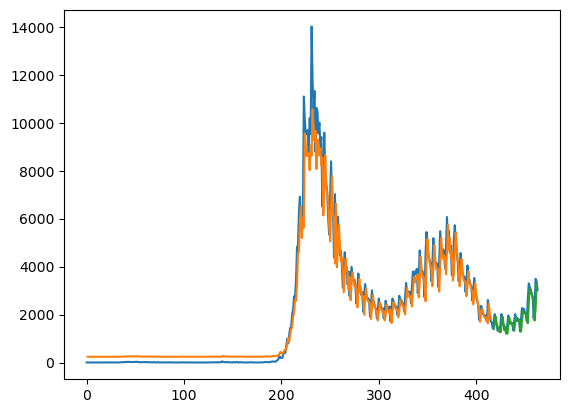

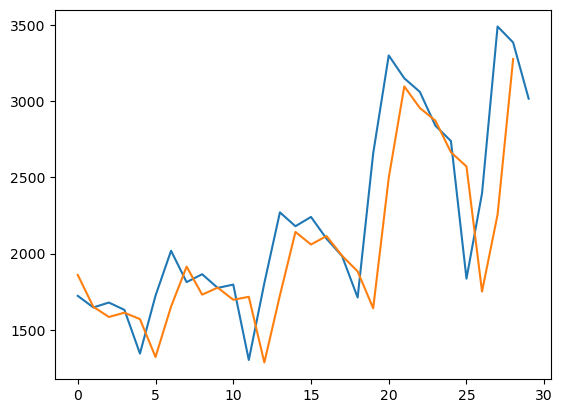

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="taoyuan_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('taoyuan_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('taoyuan_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("taoyuan_rnn+lstm_5000_predict&real_4.png")
plt.show()